In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

monkeypox


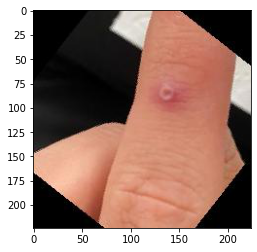

healthy


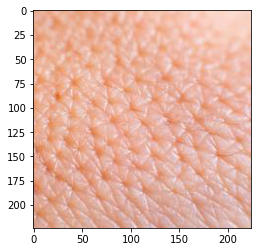

chickenpox


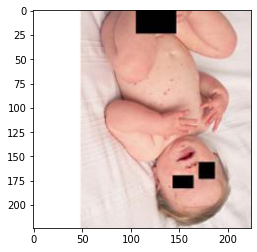

In [3]:
train_images = os.listdir('../input/monkeypox-skin-lesion-classification')
for folder in train_images :
    images = os.listdir('../input/monkeypox-skin-lesion-classification/'+str(folder))
    print(folder)
    img = mpimg.imread('../input/monkeypox-skin-lesion-classification/'+str(folder)+'/'+images[0])
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
train_path = '../input/monkeypox-skin-lesion-classification/monkeypox/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
import PIL
from PIL import Image
img = PIL.Image.open(train_path+str(files[0]))
wid, hgt = img.size
print(str(wid) + "x" + str(hgt))

224x224


In [5]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [6]:
Accuracy = {}

MobileNetV2
* input size : 400
* batch_size : 16
* hidden layers : 4
* introduced batch normalization
* introduced dropout in the last hidden layer

In [7]:
labels = os.listdir('../input/monkeypox-skin-lesion-classification')
img_size = 224
train_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

Found 21026 files belonging to 3 classes.
Using 16821 files for training.


2022-08-31 04:38:43.098597: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 21026 files belonging to 3 classes.
Using 4205 files for validation.


In [8]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/10


2022-08-31 04:38:52.312302: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 11:17 - loss: 1.2573 - accuracy: 0.4766

Cleanup called...


  9/526 [..............................] - ETA: 7:36 - loss: 1.1007 - accuracy: 0.5417

Cleanup called...


 10/526 [..............................] - ETA: 7:16 - loss: 1.0764 - accuracy: 0.5531

Cleanup called...


 12/526 [..............................] - ETA: 6:47 - loss: 1.0298 - accuracy: 0.5781

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 6:28 - loss: 0.9556 - accuracy: 0.6071

Cleanup called...


 15/526 [..............................] - ETA: 6:20 - loss: 0.9338 - accuracy: 0.6167

Cleanup called...


 16/526 [..............................] - ETA: 6:13 - loss: 0.9076 - accuracy: 0.6250

Cleanup called...


 20/526 [>.............................] - ETA: 5:49 - loss: 0.8428 - accuracy: 0.6547

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 5:36 - loss: 0.8232 - accuracy: 0.6630

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 5:23 - loss: 0.8171 - accuracy: 0.6655

Cleanup called...


 29/526 [>.............................] - ETA: 5:18 - loss: 0.8002 - accuracy: 0.6724

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 5:13 - loss: 0.7903 - accuracy: 0.6774

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 5:09 - loss: 0.7879 - accuracy: 0.6790

Cleanup called...


 40/526 [=>............................] - ETA: 4:56 - loss: 0.7394 - accuracy: 0.7031

Cleanup called...


 41/526 [=>............................] - ETA: 4:54 - loss: 0.7297 - accuracy: 0.7081

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:53 - loss: 0.7278 - accuracy: 0.7083

Cleanup called...


 47/526 [=>............................] - ETA: 4:46 - loss: 0.7060 - accuracy: 0.7174

Cleanup called...


 48/526 [=>............................] - ETA: 4:44 - loss: 0.7073 - accuracy: 0.7188

Cleanup called...


 51/526 [=>............................] - ETA: 4:42 - loss: 0.6972 - accuracy: 0.7255

Cleanup called...


 54/526 [==>...........................] - ETA: 4:38 - loss: 0.6824 - accuracy: 0.7315

Cleanup called...


 55/526 [==>...........................] - ETA: 4:37 - loss: 0.6782 - accuracy: 0.7330

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:38 - loss: 0.6688 - accuracy: 0.7362

Cleanup called...


 69/526 [==>...........................] - ETA: 4:28 - loss: 0.6310 - accuracy: 0.7514

Cleanup called...


 71/526 [===>..........................] - ETA: 4:27 - loss: 0.6283 - accuracy: 0.7535

Cleanup called...


 73/526 [===>..........................] - ETA: 4:25 - loss: 0.6187 - accuracy: 0.7577

Cleanup called...


 74/526 [===>..........................] - ETA: 4:24 - loss: 0.6175 - accuracy: 0.7589

Cleanup called...


 77/526 [===>..........................] - ETA: 4:22 - loss: 0.6096 - accuracy: 0.7618

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 4:14 - loss: 0.5863 - accuracy: 0.7707

Cleanup called...


 95/526 [====>.........................] - ETA: 4:07 - loss: 0.5654 - accuracy: 0.7793

Cleanup called...


 99/526 [====>.........................] - ETA: 4:04 - loss: 0.5588 - accuracy: 0.7828

Cleanup called...


100/526 [====>.........................] - ETA: 4:03 - loss: 0.5564 - accuracy: 0.7844

Cleanup called...


101/526 [====>.........................] - ETA: 4:02 - loss: 0.5545 - accuracy: 0.7850

Cleanup called...


103/526 [====>.........................] - ETA: 4:01 - loss: 0.5500 - accuracy: 0.7864

Cleanup called...


104/526 [====>.........................] - ETA: 4:00 - loss: 0.5464 - accuracy: 0.7879

Cleanup called...


109/526 [=====>........................] - ETA: 3:56 - loss: 0.5356 - accuracy: 0.7930

Cleanup called...


110/526 [=====>........................] - ETA: 3:56 - loss: 0.5339 - accuracy: 0.7935

Cleanup called...


113/526 [=====>........................] - ETA: 3:54 - loss: 0.5312 - accuracy: 0.7937

Cleanup called...


119/526 [=====>........................] - ETA: 3:52 - loss: 0.5197 - accuracy: 0.7981

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:48 - loss: 0.5131 - accuracy: 0.8014

Cleanup called...


129/526 [======>.......................] - ETA: 3:46 - loss: 0.5074 - accuracy: 0.8031

Cleanup called...


130/526 [======>.......................] - ETA: 3:45 - loss: 0.5047 - accuracy: 0.8043

Cleanup called...


133/526 [======>.......................] - ETA: 3:43 - loss: 0.5065 - accuracy: 0.8045

Cleanup called...


136/526 [======>.......................] - ETA: 3:41 - loss: 0.5031 - accuracy: 0.8058

Cleanup called...


139/526 [======>.......................] - ETA: 3:39 - loss: 0.5040 - accuracy: 0.8067

Cleanup called...


142/526 [=======>......................] - ETA: 3:37 - loss: 0.4973 - accuracy: 0.8094

Cleanup called...


143/526 [=======>......................] - ETA: 3:36 - loss: 0.4955 - accuracy: 0.8103

Cleanup called...


144/526 [=======>......................] - ETA: 3:35 - loss: 0.4936 - accuracy: 0.8108

Cleanup called...


148/526 [=======>......................] - ETA: 3:33 - loss: 0.4918 - accuracy: 0.8117

Cleanup called...


150/526 [=======>......................] - ETA: 3:32 - loss: 0.4903 - accuracy: 0.8123

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:30 - loss: 0.4881 - accuracy: 0.8135

Cleanup called...


157/526 [=======>......................] - ETA: 3:27 - loss: 0.4817 - accuracy: 0.8167

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:26 - loss: 0.4805 - accuracy: 0.8169

Cleanup called...


159/526 [========>.....................] - ETA: 3:26 - loss: 0.4789 - accuracy: 0.8176

Cleanup called...


160/526 [========>.....................] - ETA: 3:25 - loss: 0.4773 - accuracy: 0.8180

Cleanup called...


164/526 [========>.....................] - ETA: 3:23 - loss: 0.4743 - accuracy: 0.8192

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:22 - loss: 0.4733 - accuracy: 0.8197

Cleanup called...


168/526 [========>.....................] - ETA: 3:20 - loss: 0.4685 - accuracy: 0.8218

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:19 - loss: 0.4690 - accuracy: 0.8222

Cleanup called...


174/526 [========>.....................] - ETA: 3:18 - loss: 0.4641 - accuracy: 0.8245

Cleanup called...


176/526 [=========>....................] - ETA: 3:17 - loss: 0.4640 - accuracy: 0.8248

Cleanup called...


177/526 [=========>....................] - ETA: 3:16 - loss: 0.4629 - accuracy: 0.8250

Cleanup called...


179/526 [=========>....................] - ETA: 3:15 - loss: 0.4616 - accuracy: 0.8254

Cleanup called...


184/526 [=========>....................] - ETA: 3:12 - loss: 0.4544 - accuracy: 0.8281

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:10 - loss: 0.4527 - accuracy: 0.8291

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:10 - loss: 0.4514 - accuracy: 0.8295

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 3:08 - loss: 0.4505 - accuracy: 0.8298

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 3:06 - loss: 0.4489 - accuracy: 0.8303

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 3:06 - loss: 0.4479 - accuracy: 0.8304

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 3:03 - loss: 0.4411 - accuracy: 0.8329

Cleanup called...


200/526 [==========>...................] - ETA: 3:03 - loss: 0.4399 - accuracy: 0.8334

Cleanup called...


202/526 [==========>...................] - ETA: 3:01 - loss: 0.4395 - accuracy: 0.8338

Cleanup called...


203/526 [==========>...................] - ETA: 3:01 - loss: 0.4376 - accuracy: 0.8347

Cleanup called...


205/526 [==========>...................] - ETA: 2:59 - loss: 0.4357 - accuracy: 0.8352

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:58 - loss: 0.4339 - accuracy: 0.8356

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:56 - loss: 0.4313 - accuracy: 0.8368

Cleanup called...


212/526 [===========>..................] - ETA: 2:55 - loss: 0.4302 - accuracy: 0.8374

Cleanup called...


214/526 [===========>..................] - ETA: 2:54 - loss: 0.4282 - accuracy: 0.8383

Cleanup called...


215/526 [===========>..................] - ETA: 2:54 - loss: 0.4271 - accuracy: 0.8388

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:52 - loss: 0.4259 - accuracy: 0.8393

Cleanup called...


219/526 [===========>..................] - ETA: 2:51 - loss: 0.4239 - accuracy: 0.8402

Cleanup called...


220/526 [===========>..................] - ETA: 2:51 - loss: 0.4228 - accuracy: 0.8406

Cleanup called...


221/526 [===========>..................] - ETA: 2:50 - loss: 0.4215 - accuracy: 0.8411

Cleanup called...


222/526 [===========>..................] - ETA: 2:50 - loss: 0.4211 - accuracy: 0.8409

Cleanup called...


223/526 [===========>..................] - ETA: 2:49 - loss: 0.4207 - accuracy: 0.8412

Cleanup called...


225/526 [===========>..................] - ETA: 2:48 - loss: 0.4189 - accuracy: 0.8418

Cleanup called...


226/526 [===========>..................] - ETA: 2:47 - loss: 0.4178 - accuracy: 0.8421

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:46 - loss: 0.4151 - accuracy: 0.8432

Cleanup called...


234/526 [============>.................] - ETA: 2:43 - loss: 0.4096 - accuracy: 0.8452

Cleanup called...


239/526 [============>.................] - ETA: 2:40 - loss: 0.4093 - accuracy: 0.8452

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:39 - loss: 0.4071 - accuracy: 0.8461

Cleanup called...


252/526 [=============>................] - ETA: 2:33 - loss: 0.4000 - accuracy: 0.8480

Cleanup called...


255/526 [=============>................] - ETA: 2:31 - loss: 0.3989 - accuracy: 0.8482

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:30 - loss: 0.3984 - accuracy: 0.8484

Cleanup called...


260/526 [=============>................] - ETA: 2:28 - loss: 0.3959 - accuracy: 0.8490

Cleanup called...


261/526 [=============>................] - ETA: 2:28 - loss: 0.3961 - accuracy: 0.8491

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:27 - loss: 0.3964 - accuracy: 0.8491

Cleanup called...


263/526 [==============>...............] - ETA: 2:26 - loss: 0.3965 - accuracy: 0.8492

Cleanup called...


264/526 [==============>...............] - ETA: 2:26 - loss: 0.3952 - accuracy: 0.8498

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:25 - loss: 0.3938 - accuracy: 0.8503

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:24 - loss: 0.3933 - accuracy: 0.8505

Cleanup called...


273/526 [==============>...............] - ETA: 2:21 - loss: 0.3901 - accuracy: 0.8518

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:20 - loss: 0.3893 - accuracy: 0.8521

Cleanup called...


281/526 [===============>..............] - ETA: 2:16 - loss: 0.3857 - accuracy: 0.8538

Cleanup called...


282/526 [===============>..............] - ETA: 2:15 - loss: 0.3854 - accuracy: 0.8539

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:14 - loss: 0.3841 - accuracy: 0.8544

Cleanup called...


288/526 [===============>..............] - ETA: 2:13 - loss: 0.3820 - accuracy: 0.8554

Cleanup called...


289/526 [===============>..............] - ETA: 2:12 - loss: 0.3814 - accuracy: 0.8556

Cleanup called...


290/526 [===============>..............] - ETA: 2:11 - loss: 0.3804 - accuracy: 0.8561

Cleanup called...


294/526 [===============>..............] - ETA: 2:09 - loss: 0.3774 - accuracy: 0.8574

Cleanup called...


297/526 [===============>..............] - ETA: 2:07 - loss: 0.3758 - accuracy: 0.8581

Cleanup called...


302/526 [================>.............] - ETA: 2:05 - loss: 0.3749 - accuracy: 0.8587

Cleanup called...


310/526 [================>.............] - ETA: 2:00 - loss: 0.3703 - accuracy: 0.8609

Cleanup called...


312/526 [================>.............] - ETA: 1:59 - loss: 0.3692 - accuracy: 0.8612

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:55 - loss: 0.3676 - accuracy: 0.8618

Cleanup called...


320/526 [=================>............] - ETA: 1:54 - loss: 0.3675 - accuracy: 0.8619

Cleanup called...


321/526 [=================>............] - ETA: 1:54 - loss: 0.3666 - accuracy: 0.8622

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:53 - loss: 0.3657 - accuracy: 0.8626

Cleanup called...


326/526 [=================>............] - ETA: 1:51 - loss: 0.3638 - accuracy: 0.8630

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:50 - loss: 0.3636 - accuracy: 0.8632

Cleanup called...


335/526 [==================>...........] - ETA: 1:46 - loss: 0.3607 - accuracy: 0.8642

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:45 - loss: 0.3601 - accuracy: 0.8645

Cleanup called...


341/526 [==================>...........] - ETA: 1:42 - loss: 0.3586 - accuracy: 0.8652

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:41 - loss: 0.3569 - accuracy: 0.8659

Cleanup called...


347/526 [==================>...........] - ETA: 1:39 - loss: 0.3546 - accuracy: 0.8667

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:37 - loss: 0.3532 - accuracy: 0.8672

Cleanup called...


359/526 [===================>..........] - ETA: 1:32 - loss: 0.3491 - accuracy: 0.8686

Cleanup called...


360/526 [===================>..........] - ETA: 1:32 - loss: 0.3486 - accuracy: 0.8687

Cleanup called...


361/526 [===================>..........] - ETA: 1:31 - loss: 0.3481 - accuracy: 0.8690

Cleanup called...


362/526 [===================>..........] - ETA: 1:31 - loss: 0.3475 - accuracy: 0.8693

Cleanup called...


363/526 [===================>..........] - ETA: 1:30 - loss: 0.3468 - accuracy: 0.8696

Cleanup called...


365/526 [===================>..........] - ETA: 1:29 - loss: 0.3460 - accuracy: 0.8699

Cleanup called...


368/526 [===================>..........] - ETA: 1:27 - loss: 0.3457 - accuracy: 0.8701

Cleanup called...


373/526 [====================>.........] - ETA: 1:24 - loss: 0.3435 - accuracy: 0.8707

Cleanup called...


374/526 [====================>.........] - ETA: 1:24 - loss: 0.3434 - accuracy: 0.8707

Cleanup called...


376/526 [====================>.........] - ETA: 1:23 - loss: 0.3430 - accuracy: 0.8711

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:21 - loss: 0.3410 - accuracy: 0.8717

Cleanup called...


381/526 [====================>.........] - ETA: 1:20 - loss: 0.3406 - accuracy: 0.8717

Cleanup called...


387/526 [=====================>........] - ETA: 1:17 - loss: 0.3377 - accuracy: 0.8729

Cleanup called...


389/526 [=====================>........] - ETA: 1:15 - loss: 0.3367 - accuracy: 0.8733

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:14 - loss: 0.3356 - accuracy: 0.8737

Cleanup called...


404/526 [======================>.......] - ETA: 1:07 - loss: 0.3297 - accuracy: 0.8758

Cleanup called...


407/526 [======================>.......] - ETA: 1:06 - loss: 0.3285 - accuracy: 0.8762

Cleanup called...


409/526 [======================>.......] - ETA: 1:05 - loss: 0.3272 - accuracy: 0.8768

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:04 - loss: 0.3268 - accuracy: 0.8769

Cleanup called...


411/526 [======================>.......] - ETA: 1:03 - loss: 0.3265 - accuracy: 0.8770

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:03 - loss: 0.3258 - accuracy: 0.8773

Cleanup called...


413/526 [======================>.......] - ETA: 1:02 - loss: 0.3252 - accuracy: 0.8775

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 1:01 - loss: 0.3246 - accuracy: 0.8778

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 59s - loss: 0.3240 - accuracy: 0.8781 

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 59s - loss: 0.3242 - accuracy: 0.8779

Cleanup called...


422/526 [=======================>......] - ETA: 57s - loss: 0.3228 - accuracy: 0.8784

Cleanup called...


425/526 [=======================>......] - ETA: 56s - loss: 0.3218 - accuracy: 0.8788

Cleanup called...


430/526 [=======================>......] - ETA: 53s - loss: 0.3194 - accuracy: 0.8798

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 51s - loss: 0.3183 - accuracy: 0.8801

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 48s - loss: 0.3169 - accuracy: 0.8805

Cleanup called...


439/526 [========================>.....] - ETA: 48s - loss: 0.3164 - accuracy: 0.8806

Cleanup called...


440/526 [========================>.....] - ETA: 47s - loss: 0.3166 - accuracy: 0.8804

Cleanup called...


441/526 [========================>.....] - ETA: 47s - loss: 0.3161 - accuracy: 0.8805

Cleanup called...


444/526 [========================>.....] - ETA: 45s - loss: 0.3150 - accuracy: 0.8809

Cleanup called...


447/526 [========================>.....] - ETA: 43s - loss: 0.3138 - accuracy: 0.8813

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 41s - loss: 0.3128 - accuracy: 0.8816

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 40s - loss: 0.3124 - accuracy: 0.8818

Cleanup called...


456/526 [=========================>....] - ETA: 38s - loss: 0.3110 - accuracy: 0.8823

Cleanup called...


457/526 [=========================>....] - ETA: 38s - loss: 0.3105 - accuracy: 0.8826

Cleanup called...


460/526 [=========================>....] - ETA: 36s - loss: 0.3095 - accuracy: 0.8830

Cleanup called...


461/526 [=========================>....] - ETA: 36s - loss: 0.3092 - accuracy: 0.8831

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 33s - loss: 0.3078 - accuracy: 0.8837

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 32s - loss: 0.3067 - accuracy: 0.8839

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.3048 - accuracy: 0.8847

Cleanup called...


478/526 [==========================>...] - ETA: 26s - loss: 0.3033 - accuracy: 0.8854

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.3016 - accuracy: 0.8862

Cleanup called...


489/526 [==========================>...] - ETA: 20s - loss: 0.2999 - accuracy: 0.8868

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.2983 - accuracy: 0.8875

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.2973 - accuracy: 0.8880

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.2955 - accuracy: 0.8887

Cleanup called...


504/526 [===========================>..] - ETA: 12s - loss: 0.2954 - accuracy: 0.8888

Cleanup called...


506/526 [===========================>..] - ETA: 11s - loss: 0.2949 - accuracy: 0.8890

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.2946 - accuracy: 0.8891

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.2951 - accuracy: 0.8890 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.2937 - accuracy: 0.8895

Cleanup called...


526/526 [==============================] - 354s 659ms/step - loss: 0.2892 - accuracy: 0.8913 - val_loss: 0.1356 - val_accuracy: 0.9493
Epoch 2/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:43 - loss: 0.1531 - accuracy: 0.9688

Cleanup called...


  9/526 [..............................] - ETA: 4:32 - loss: 0.1385 - accuracy: 0.9688

Cleanup called...


 10/526 [..............................] - ETA: 4:32 - loss: 0.1310 - accuracy: 0.9688

Cleanup called...


 12/526 [..............................] - ETA: 4:30 - loss: 0.1464 - accuracy: 0.9583

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:29 - loss: 0.1440 - accuracy: 0.9576

Cleanup called...


 15/526 [..............................] - ETA: 4:28 - loss: 0.1406 - accuracy: 0.9583

Cleanup called...


 16/526 [..............................] - ETA: 4:27 - loss: 0.1348 - accuracy: 0.9609

Cleanup called...


 20/526 [>.............................] - ETA: 4:25 - loss: 0.1343 - accuracy: 0.9578

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:24 - loss: 0.1305 - accuracy: 0.9606

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:22 - loss: 0.1427 - accuracy: 0.9537

Cleanup called...


 29/526 [>.............................] - ETA: 4:20 - loss: 0.1433 - accuracy: 0.9526

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:19 - loss: 0.1411 - accuracy: 0.9516

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:18 - loss: 0.1380 - accuracy: 0.9527

Cleanup called...


 40/526 [=>............................] - ETA: 4:14 - loss: 0.1329 - accuracy: 0.9539

Cleanup called...


 41/526 [=>............................] - ETA: 4:14 - loss: 0.1321 - accuracy: 0.9527

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:13 - loss: 0.1355 - accuracy: 0.9501

Cleanup called...


 47/526 [=>............................] - ETA: 4:11 - loss: 0.1341 - accuracy: 0.9501

Cleanup called...


 48/526 [=>............................] - ETA: 4:10 - loss: 0.1325 - accuracy: 0.9505

Cleanup called...


 51/526 [=>............................] - ETA: 4:09 - loss: 0.1302 - accuracy: 0.9516

Cleanup called...


 54/526 [==>...........................] - ETA: 4:07 - loss: 0.1320 - accuracy: 0.9508

Cleanup called...


 55/526 [==>...........................] - ETA: 4:07 - loss: 0.1318 - accuracy: 0.9506

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:10 - loss: 0.1328 - accuracy: 0.9486

Cleanup called...


 69/526 [==>...........................] - ETA: 4:04 - loss: 0.1323 - accuracy: 0.9479

Cleanup called...


 71/526 [===>..........................] - ETA: 4:03 - loss: 0.1293 - accuracy: 0.9494

Cleanup called...


 73/526 [===>..........................] - ETA: 4:01 - loss: 0.1282 - accuracy: 0.9495

Cleanup called...


 74/526 [===>..........................] - ETA: 4:01 - loss: 0.1277 - accuracy: 0.9497

Cleanup called...


 77/526 [===>..........................] - ETA: 3:59 - loss: 0.1288 - accuracy: 0.9497

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:54 - loss: 0.1291 - accuracy: 0.9513

Cleanup called...


 95/526 [====>.........................] - ETA: 3:48 - loss: 0.1345 - accuracy: 0.9493

Cleanup called...


 99/526 [====>.........................] - ETA: 3:46 - loss: 0.1380 - accuracy: 0.9479

Cleanup called...


100/526 [====>.........................] - ETA: 3:46 - loss: 0.1376 - accuracy: 0.9481

Cleanup called...


101/526 [====>.........................] - ETA: 3:45 - loss: 0.1368 - accuracy: 0.9483

Cleanup called...


103/526 [====>.........................] - ETA: 3:44 - loss: 0.1362 - accuracy: 0.9484

Cleanup called...


104/526 [====>.........................] - ETA: 3:43 - loss: 0.1363 - accuracy: 0.9483

Cleanup called...


109/526 [=====>........................] - ETA: 3:41 - loss: 0.1363 - accuracy: 0.9490

Cleanup called...


110/526 [=====>........................] - ETA: 3:40 - loss: 0.1372 - accuracy: 0.9483

Cleanup called...


113/526 [=====>........................] - ETA: 3:39 - loss: 0.1365 - accuracy: 0.9488

Cleanup called...


119/526 [=====>........................] - ETA: 3:38 - loss: 0.1342 - accuracy: 0.9493

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:35 - loss: 0.1350 - accuracy: 0.9493

Cleanup called...


129/526 [======>.......................] - ETA: 3:32 - loss: 0.1341 - accuracy: 0.9501

Cleanup called...


130/526 [======>.......................] - ETA: 3:31 - loss: 0.1335 - accuracy: 0.9505

Cleanup called...


133/526 [======>.......................] - ETA: 3:30 - loss: 0.1319 - accuracy: 0.9511

Cleanup called...


136/526 [======>.......................] - ETA: 3:28 - loss: 0.1318 - accuracy: 0.9511

Cleanup called...


139/526 [======>.......................] - ETA: 3:26 - loss: 0.1317 - accuracy: 0.9512

Cleanup called...


142/526 [=======>......................] - ETA: 3:24 - loss: 0.1319 - accuracy: 0.9511

Cleanup called...


143/526 [=======>......................] - ETA: 3:24 - loss: 0.1313 - accuracy: 0.9513

Cleanup called...


144/526 [=======>......................] - ETA: 3:23 - loss: 0.1325 - accuracy: 0.9510

Cleanup called...


148/526 [=======>......................] - ETA: 3:21 - loss: 0.1318 - accuracy: 0.9512

Cleanup called...


150/526 [=======>......................] - ETA: 3:20 - loss: 0.1314 - accuracy: 0.9513

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:19 - loss: 0.1319 - accuracy: 0.9511

Cleanup called...


157/526 [=======>......................] - ETA: 3:16 - loss: 0.1318 - accuracy: 0.9508

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:15 - loss: 0.1325 - accuracy: 0.9509

Cleanup called...


159/526 [========>.....................] - ETA: 3:15 - loss: 0.1328 - accuracy: 0.9511

Cleanup called...


160/526 [========>.....................] - ETA: 3:14 - loss: 0.1321 - accuracy: 0.9514

Cleanup called...


164/526 [========>.....................] - ETA: 3:12 - loss: 0.1305 - accuracy: 0.9522

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:12 - loss: 0.1301 - accuracy: 0.9523

Cleanup called...


168/526 [========>.....................] - ETA: 3:10 - loss: 0.1290 - accuracy: 0.9529

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:09 - loss: 0.1279 - accuracy: 0.9535

Cleanup called...


174/526 [========>.....................] - ETA: 3:07 - loss: 0.1294 - accuracy: 0.9526

Cleanup called...


176/526 [=========>....................] - ETA: 3:07 - loss: 0.1295 - accuracy: 0.9522

Cleanup called...


177/526 [=========>....................] - ETA: 3:06 - loss: 0.1293 - accuracy: 0.9523

Cleanup called...


179/526 [=========>....................] - ETA: 3:05 - loss: 0.1291 - accuracy: 0.9522

Cleanup called...


184/526 [=========>....................] - ETA: 3:02 - loss: 0.1271 - accuracy: 0.9533

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:01 - loss: 0.1264 - accuracy: 0.9536

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:01 - loss: 0.1267 - accuracy: 0.9535

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 2:59 - loss: 0.1266 - accuracy: 0.9535

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 2:58 - loss: 0.1261 - accuracy: 0.9537

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 2:57 - loss: 0.1255 - accuracy: 0.9539

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:54 - loss: 0.1249 - accuracy: 0.9543

Cleanup called...


200/526 [==========>...................] - ETA: 2:54 - loss: 0.1253 - accuracy: 0.9542

Cleanup called...


202/526 [==========>...................] - ETA: 2:53 - loss: 0.1252 - accuracy: 0.9542

Cleanup called...


203/526 [==========>...................] - ETA: 2:52 - loss: 0.1253 - accuracy: 0.9541

Cleanup called...


205/526 [==========>...................] - ETA: 2:51 - loss: 0.1255 - accuracy: 0.9543

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:50 - loss: 0.1257 - accuracy: 0.9541

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:48 - loss: 0.1252 - accuracy: 0.9544

Cleanup called...


212/526 [===========>..................] - ETA: 2:47 - loss: 0.1251 - accuracy: 0.9543

Cleanup called...


214/526 [===========>..................] - ETA: 2:46 - loss: 0.1247 - accuracy: 0.9544

Cleanup called...


215/526 [===========>..................] - ETA: 2:45 - loss: 0.1249 - accuracy: 0.9545

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:44 - loss: 0.1247 - accuracy: 0.9543

Cleanup called...


219/526 [===========>..................] - ETA: 2:43 - loss: 0.1242 - accuracy: 0.9546

Cleanup called...


220/526 [===========>..................] - ETA: 2:43 - loss: 0.1246 - accuracy: 0.9545

Cleanup called...


221/526 [===========>..................] - ETA: 2:42 - loss: 0.1249 - accuracy: 0.9543

Cleanup called...


222/526 [===========>..................] - ETA: 2:42 - loss: 0.1258 - accuracy: 0.9543

Cleanup called...


223/526 [===========>..................] - ETA: 2:41 - loss: 0.1260 - accuracy: 0.9543

Cleanup called...


225/526 [===========>..................] - ETA: 2:40 - loss: 0.1252 - accuracy: 0.9547

Cleanup called...


226/526 [===========>..................] - ETA: 2:39 - loss: 0.1253 - accuracy: 0.9546

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:38 - loss: 0.1255 - accuracy: 0.9546

Cleanup called...


234/526 [============>.................] - ETA: 2:36 - loss: 0.1247 - accuracy: 0.9551

Cleanup called...


239/526 [============>.................] - ETA: 2:33 - loss: 0.1247 - accuracy: 0.9552

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:32 - loss: 0.1240 - accuracy: 0.9554

Cleanup called...


252/526 [=============>................] - ETA: 2:26 - loss: 0.1252 - accuracy: 0.9544

Cleanup called...


255/526 [=============>................] - ETA: 2:24 - loss: 0.1256 - accuracy: 0.9540

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:24 - loss: 0.1255 - accuracy: 0.9541

Cleanup called...


260/526 [=============>................] - ETA: 2:22 - loss: 0.1252 - accuracy: 0.9542

Cleanup called...


261/526 [=============>................] - ETA: 2:21 - loss: 0.1251 - accuracy: 0.9543

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:20 - loss: 0.1250 - accuracy: 0.9542

Cleanup called...


263/526 [==============>...............] - ETA: 2:20 - loss: 0.1247 - accuracy: 0.9544

Cleanup called...


264/526 [==============>...............] - ETA: 2:19 - loss: 0.1253 - accuracy: 0.9543

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:18 - loss: 0.1246 - accuracy: 0.9545

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:18 - loss: 0.1243 - accuracy: 0.9547

Cleanup called...


273/526 [==============>...............] - ETA: 2:15 - loss: 0.1234 - accuracy: 0.9551

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:14 - loss: 0.1231 - accuracy: 0.9553

Cleanup called...


281/526 [===============>..............] - ETA: 2:10 - loss: 0.1225 - accuracy: 0.9554

Cleanup called...


282/526 [===============>..............] - ETA: 2:10 - loss: 0.1222 - accuracy: 0.9556

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:09 - loss: 0.1230 - accuracy: 0.9555

Cleanup called...


288/526 [===============>..............] - ETA: 2:06 - loss: 0.1231 - accuracy: 0.9556

Cleanup called...


289/526 [===============>..............] - ETA: 2:06 - loss: 0.1228 - accuracy: 0.9558

Cleanup called...


290/526 [===============>..............] - ETA: 2:05 - loss: 0.1230 - accuracy: 0.9557

Cleanup called...


294/526 [===============>..............] - ETA: 2:04 - loss: 0.1232 - accuracy: 0.9558

Cleanup called...


297/526 [===============>..............] - ETA: 2:02 - loss: 0.1232 - accuracy: 0.9559

Cleanup called...


302/526 [================>.............] - ETA: 1:59 - loss: 0.1251 - accuracy: 0.9554

Cleanup called...


310/526 [================>.............] - ETA: 1:55 - loss: 0.1239 - accuracy: 0.9559

Cleanup called...


312/526 [================>.............] - ETA: 1:54 - loss: 0.1238 - accuracy: 0.9559

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:50 - loss: 0.1231 - accuracy: 0.9562

Cleanup called...


320/526 [=================>............] - ETA: 1:50 - loss: 0.1230 - accuracy: 0.9562

Cleanup called...


321/526 [=================>............] - ETA: 1:49 - loss: 0.1228 - accuracy: 0.9563

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:48 - loss: 0.1226 - accuracy: 0.9563

Cleanup called...


326/526 [=================>............] - ETA: 1:46 - loss: 0.1221 - accuracy: 0.9567

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:45 - loss: 0.1225 - accuracy: 0.9565

Cleanup called...


335/526 [==================>...........] - ETA: 1:41 - loss: 0.1218 - accuracy: 0.9567

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:41 - loss: 0.1216 - accuracy: 0.9568

Cleanup called...


341/526 [==================>...........] - ETA: 1:38 - loss: 0.1207 - accuracy: 0.9570

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:37 - loss: 0.1216 - accuracy: 0.9569

Cleanup called...


347/526 [==================>...........] - ETA: 1:35 - loss: 0.1218 - accuracy: 0.9566

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:33 - loss: 0.1220 - accuracy: 0.9564

Cleanup called...


359/526 [===================>..........] - ETA: 1:29 - loss: 0.1213 - accuracy: 0.9566

Cleanup called...


360/526 [===================>..........] - ETA: 1:28 - loss: 0.1216 - accuracy: 0.9565

Cleanup called...


361/526 [===================>..........] - ETA: 1:28 - loss: 0.1215 - accuracy: 0.9566

Cleanup called...


362/526 [===================>..........] - ETA: 1:27 - loss: 0.1218 - accuracy: 0.9566

Cleanup called...


363/526 [===================>..........] - ETA: 1:27 - loss: 0.1219 - accuracy: 0.9564

Cleanup called...


365/526 [===================>..........] - ETA: 1:26 - loss: 0.1219 - accuracy: 0.9564

Cleanup called...


368/526 [===================>..........] - ETA: 1:24 - loss: 0.1217 - accuracy: 0.9564

Cleanup called...


373/526 [====================>.........] - ETA: 1:21 - loss: 0.1222 - accuracy: 0.9562

Cleanup called...


374/526 [====================>.........] - ETA: 1:21 - loss: 0.1220 - accuracy: 0.9562

Cleanup called...


376/526 [====================>.........] - ETA: 1:20 - loss: 0.1219 - accuracy: 0.9562

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:18 - loss: 0.1214 - accuracy: 0.9563

Cleanup called...


381/526 [====================>.........] - ETA: 1:17 - loss: 0.1213 - accuracy: 0.9564

Cleanup called...


387/526 [=====================>........] - ETA: 1:14 - loss: 0.1204 - accuracy: 0.9567

Cleanup called...


389/526 [=====================>........] - ETA: 1:13 - loss: 0.1200 - accuracy: 0.9569

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:11 - loss: 0.1202 - accuracy: 0.9568

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.1188 - accuracy: 0.9571

Cleanup called...


407/526 [======================>.......] - ETA: 1:03 - loss: 0.1191 - accuracy: 0.9572

Cleanup called...


409/526 [======================>.......] - ETA: 1:02 - loss: 0.1189 - accuracy: 0.9574

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:01 - loss: 0.1189 - accuracy: 0.9574

Cleanup called...


411/526 [======================>.......] - ETA: 1:01 - loss: 0.1187 - accuracy: 0.9575

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.1184 - accuracy: 0.9576

Cleanup called...


413/526 [======================>.......] - ETA: 1:00 - loss: 0.1185 - accuracy: 0.9576

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 59s - loss: 0.1182 - accuracy: 0.9578

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 57s - loss: 0.1180 - accuracy: 0.9578

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.1178 - accuracy: 0.9579

Cleanup called...


422/526 [=======================>......] - ETA: 55s - loss: 0.1176 - accuracy: 0.9580

Cleanup called...


425/526 [=======================>......] - ETA: 54s - loss: 0.1172 - accuracy: 0.9582

Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.1165 - accuracy: 0.9585

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 49s - loss: 0.1162 - accuracy: 0.9586

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.1164 - accuracy: 0.9585

Cleanup called...


439/526 [========================>.....] - ETA: 46s - loss: 0.1166 - accuracy: 0.9583

Cleanup called...


440/526 [========================>.....] - ETA: 45s - loss: 0.1165 - accuracy: 0.9583

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.1168 - accuracy: 0.9582

Cleanup called...


444/526 [========================>.....] - ETA: 43s - loss: 0.1178 - accuracy: 0.9581

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.1175 - accuracy: 0.9581

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.1176 - accuracy: 0.9581

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 39s - loss: 0.1174 - accuracy: 0.9582

Cleanup called...


456/526 [=========================>....] - ETA: 37s - loss: 0.1178 - accuracy: 0.9580

Cleanup called...


457/526 [=========================>....] - ETA: 36s - loss: 0.1177 - accuracy: 0.9580

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.1174 - accuracy: 0.9582

Cleanup called...


461/526 [=========================>....] - ETA: 34s - loss: 0.1178 - accuracy: 0.9580

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.1172 - accuracy: 0.9581

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 30s - loss: 0.1167 - accuracy: 0.9583

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 28s - loss: 0.1162 - accuracy: 0.9585

Cleanup called...


478/526 [==========================>...] - ETA: 25s - loss: 0.1164 - accuracy: 0.9584

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.1165 - accuracy: 0.9582

Cleanup called...


489/526 [==========================>...] - ETA: 19s - loss: 0.1165 - accuracy: 0.9580

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.1163 - accuracy: 0.9581

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 14s - loss: 0.1162 - accuracy: 0.9580

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.1166 - accuracy: 0.9578

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.1177 - accuracy: 0.9575

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.1175 - accuracy: 0.9576

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.1178 - accuracy: 0.9575

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.1176 - accuracy: 0.9576 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.1175 - accuracy: 0.9575

Cleanup called...


526/526 [==============================] - 334s 635ms/step - loss: 0.1162 - accuracy: 0.9580 - val_loss: 0.2488 - val_accuracy: 0.9199
Epoch 3/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:33 - loss: 0.0525 - accuracy: 0.9766

Cleanup called...


  9/526 [..............................] - ETA: 4:32 - loss: 0.0646 - accuracy: 0.9722

Cleanup called...


 10/526 [..............................] - ETA: 4:31 - loss: 0.0618 - accuracy: 0.9750

Cleanup called...


 12/526 [..............................] - ETA: 4:30 - loss: 0.0630 - accuracy: 0.9740

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:28 - loss: 0.0596 - accuracy: 0.9754

Cleanup called...


 15/526 [..............................] - ETA: 4:27 - loss: 0.0567 - accuracy: 0.9771

Cleanup called...


 16/526 [..............................] - ETA: 4:27 - loss: 0.0546 - accuracy: 0.9785

Cleanup called...


 20/526 [>.............................] - ETA: 4:24 - loss: 0.0650 - accuracy: 0.9750

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:22 - loss: 0.0666 - accuracy: 0.9769

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:19 - loss: 0.0743 - accuracy: 0.9734

Cleanup called...


 29/526 [>.............................] - ETA: 4:19 - loss: 0.0777 - accuracy: 0.9720

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:18 - loss: 0.0769 - accuracy: 0.9728

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:17 - loss: 0.0730 - accuracy: 0.9744

Cleanup called...


 40/526 [=>............................] - ETA: 4:14 - loss: 0.0711 - accuracy: 0.9734

Cleanup called...


 41/526 [=>............................] - ETA: 4:13 - loss: 0.0732 - accuracy: 0.9733

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:13 - loss: 0.0760 - accuracy: 0.9725

Cleanup called...


 47/526 [=>............................] - ETA: 4:11 - loss: 0.0727 - accuracy: 0.9741

Cleanup called...


 48/526 [=>............................] - ETA: 4:17 - loss: 0.0733 - accuracy: 0.9733

Cleanup called...


 51/526 [=>............................] - ETA: 4:16 - loss: 0.0752 - accuracy: 0.9730

Cleanup called...


 54/526 [==>...........................] - ETA: 4:13 - loss: 0.0728 - accuracy: 0.9745

Cleanup called...


 55/526 [==>...........................] - ETA: 4:13 - loss: 0.0719 - accuracy: 0.9750

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:10 - loss: 0.0753 - accuracy: 0.9740

Cleanup called...


 69/526 [==>...........................] - ETA: 4:03 - loss: 0.0823 - accuracy: 0.9733

Cleanup called...


 71/526 [===>..........................] - ETA: 4:02 - loss: 0.0805 - accuracy: 0.9740

Cleanup called...


 73/526 [===>..........................] - ETA: 4:01 - loss: 0.0850 - accuracy: 0.9730

Cleanup called...


 74/526 [===>..........................] - ETA: 4:01 - loss: 0.0839 - accuracy: 0.9734

Cleanup called...


 77/526 [===>..........................] - ETA: 3:59 - loss: 0.0861 - accuracy: 0.9732

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:53 - loss: 0.0861 - accuracy: 0.9738

Cleanup called...


 94/526 [====>.........................] - ETA: 3:52 - loss: 0.0886 - accuracy: 0.9727

Cleanup called...


 98/526 [====>.........................] - ETA: 3:49 - loss: 0.0887 - accuracy: 0.9726

Cleanup called...


 99/526 [====>.........................] - ETA: 3:49 - loss: 0.0883 - accuracy: 0.9725

Cleanup called...


100/526 [====>.........................] - ETA: 3:48 - loss: 0.0884 - accuracy: 0.9725

Cleanup called...


102/526 [====>.........................] - ETA: 3:47 - loss: 0.0873 - accuracy: 0.9730

Cleanup called...


103/526 [====>.........................] - ETA: 3:46 - loss: 0.0896 - accuracy: 0.9721

Cleanup called...


108/526 [=====>........................] - ETA: 3:46 - loss: 0.0894 - accuracy: 0.9716

Cleanup called...


109/526 [=====>........................] - ETA: 3:45 - loss: 0.0894 - accuracy: 0.9716

Cleanup called...


112/526 [=====>........................] - ETA: 3:43 - loss: 0.0931 - accuracy: 0.9696

Cleanup called...


118/526 [=====>........................] - ETA: 3:40 - loss: 0.0960 - accuracy: 0.9690

Cleanup called...
Cleanup called...


123/526 [======>.......................] - ETA: 3:37 - loss: 0.0944 - accuracy: 0.9695

Cleanup called...


128/526 [======>.......................] - ETA: 3:34 - loss: 0.0963 - accuracy: 0.9685

Cleanup called...


129/526 [======>.......................] - ETA: 3:33 - loss: 0.0958 - accuracy: 0.9688

Cleanup called...


132/526 [======>.......................] - ETA: 3:32 - loss: 0.0968 - accuracy: 0.9685

Cleanup called...


135/526 [======>.......................] - ETA: 3:30 - loss: 0.0963 - accuracy: 0.9688

Cleanup called...


138/526 [======>.......................] - ETA: 3:29 - loss: 0.0959 - accuracy: 0.9690

Cleanup called...


141/526 [=======>......................] - ETA: 3:27 - loss: 0.0963 - accuracy: 0.9685

Cleanup called...


142/526 [=======>......................] - ETA: 3:26 - loss: 0.0967 - accuracy: 0.9683

Cleanup called...


143/526 [=======>......................] - ETA: 3:26 - loss: 0.0971 - accuracy: 0.9679

Cleanup called...


147/526 [=======>......................] - ETA: 3:23 - loss: 0.0979 - accuracy: 0.9679

Cleanup called...


149/526 [=======>......................] - ETA: 3:22 - loss: 0.0990 - accuracy: 0.9675

Cleanup called...
Cleanup called...


151/526 [=======>......................] - ETA: 3:21 - loss: 0.0992 - accuracy: 0.9675

Cleanup called...


156/526 [=======>......................] - ETA: 3:18 - loss: 0.0994 - accuracy: 0.9671

Cleanup called...
Cleanup called...


157/526 [=======>......................] - ETA: 3:18 - loss: 0.0992 - accuracy: 0.9672

Cleanup called...


158/526 [========>.....................] - ETA: 3:17 - loss: 0.1000 - accuracy: 0.9672

Cleanup called...


159/526 [========>.....................] - ETA: 3:17 - loss: 0.0996 - accuracy: 0.9674

Cleanup called...


163/526 [========>.....................] - ETA: 3:14 - loss: 0.0983 - accuracy: 0.9678

Cleanup called...
Cleanup called...


164/526 [========>.....................] - ETA: 3:15 - loss: 0.0981 - accuracy: 0.9678

Cleanup called...


167/526 [========>.....................] - ETA: 3:14 - loss: 0.0984 - accuracy: 0.9678

Cleanup called...
Cleanup called...


169/526 [========>.....................] - ETA: 3:12 - loss: 0.0978 - accuracy: 0.9680

Cleanup called...


173/526 [========>.....................] - ETA: 3:10 - loss: 0.0972 - accuracy: 0.9682

Cleanup called...


175/526 [========>.....................] - ETA: 3:09 - loss: 0.0972 - accuracy: 0.9682

Cleanup called...


176/526 [=========>....................] - ETA: 3:09 - loss: 0.0968 - accuracy: 0.9684

Cleanup called...


178/526 [=========>....................] - ETA: 3:07 - loss: 0.0962 - accuracy: 0.9686

Cleanup called...


183/526 [=========>....................] - ETA: 3:05 - loss: 0.0958 - accuracy: 0.9686

Cleanup called...
Cleanup called...


185/526 [=========>....................] - ETA: 3:03 - loss: 0.0958 - accuracy: 0.9686

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:03 - loss: 0.0959 - accuracy: 0.9686

Cleanup called...
Cleanup called...


190/526 [=========>....................] - ETA: 3:01 - loss: 0.0949 - accuracy: 0.9689

Cleanup called...
Cleanup called...


192/526 [=========>....................] - ETA: 3:00 - loss: 0.0952 - accuracy: 0.9691

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 2:59 - loss: 0.0950 - accuracy: 0.9691

Cleanup called...
Cleanup called...
Cleanup called...


198/526 [==========>...................] - ETA: 2:56 - loss: 0.0932 - accuracy: 0.9697

Cleanup called...


199/526 [==========>...................] - ETA: 2:56 - loss: 0.0930 - accuracy: 0.9697

Cleanup called...


201/526 [==========>...................] - ETA: 2:54 - loss: 0.0937 - accuracy: 0.9692

Cleanup called...


202/526 [==========>...................] - ETA: 2:54 - loss: 0.0941 - accuracy: 0.9691

Cleanup called...


204/526 [==========>...................] - ETA: 2:53 - loss: 0.0938 - accuracy: 0.9691

Cleanup called...
Cleanup called...


206/526 [==========>...................] - ETA: 2:52 - loss: 0.0930 - accuracy: 0.9694

Cleanup called...
Cleanup called...


210/526 [==========>...................] - ETA: 2:49 - loss: 0.0931 - accuracy: 0.9690

Cleanup called...


211/526 [===========>..................] - ETA: 2:49 - loss: 0.0929 - accuracy: 0.9690

Cleanup called...


213/526 [===========>..................] - ETA: 2:48 - loss: 0.0928 - accuracy: 0.9690

Cleanup called...


214/526 [===========>..................] - ETA: 2:47 - loss: 0.0927 - accuracy: 0.9690

Cleanup called...
Cleanup called...


216/526 [===========>..................] - ETA: 2:46 - loss: 0.0921 - accuracy: 0.9692

Cleanup called...


218/526 [===========>..................] - ETA: 2:45 - loss: 0.0916 - accuracy: 0.9693

Cleanup called...


219/526 [===========>..................] - ETA: 2:45 - loss: 0.0915 - accuracy: 0.9695

Cleanup called...


220/526 [===========>..................] - ETA: 2:44 - loss: 0.0912 - accuracy: 0.9696

Cleanup called...


221/526 [===========>..................] - ETA: 2:44 - loss: 0.0913 - accuracy: 0.9696

Cleanup called...


222/526 [===========>..................] - ETA: 2:44 - loss: 0.0910 - accuracy: 0.9697

Cleanup called...


224/526 [===========>..................] - ETA: 2:43 - loss: 0.0906 - accuracy: 0.9699

Cleanup called...


225/526 [===========>..................] - ETA: 2:42 - loss: 0.0904 - accuracy: 0.9700

Cleanup called...
Cleanup called...


227/526 [===========>..................] - ETA: 2:41 - loss: 0.0912 - accuracy: 0.9700

Cleanup called...


233/526 [============>.................] - ETA: 2:38 - loss: 0.0898 - accuracy: 0.9706

Cleanup called...


238/526 [============>.................] - ETA: 2:35 - loss: 0.0901 - accuracy: 0.9703

Cleanup called...
Cleanup called...
Cleanup called...


240/526 [============>.................] - ETA: 2:34 - loss: 0.0897 - accuracy: 0.9704

Cleanup called...


251/526 [=============>................] - ETA: 2:28 - loss: 0.0886 - accuracy: 0.9710

Cleanup called...


254/526 [=============>................] - ETA: 2:26 - loss: 0.0882 - accuracy: 0.9711

Cleanup called...
Cleanup called...


255/526 [=============>................] - ETA: 2:26 - loss: 0.0879 - accuracy: 0.9712

Cleanup called...


259/526 [=============>................] - ETA: 2:23 - loss: 0.0877 - accuracy: 0.9713

Cleanup called...


260/526 [=============>................] - ETA: 2:23 - loss: 0.0875 - accuracy: 0.9714

Cleanup called...
Cleanup called...


261/526 [=============>................] - ETA: 2:22 - loss: 0.0875 - accuracy: 0.9714

Cleanup called...


262/526 [=============>................] - ETA: 2:22 - loss: 0.0881 - accuracy: 0.9711

Cleanup called...


263/526 [==============>...............] - ETA: 2:21 - loss: 0.0880 - accuracy: 0.9711

Cleanup called...
Cleanup called...


265/526 [==============>...............] - ETA: 2:20 - loss: 0.0878 - accuracy: 0.9712

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:19 - loss: 0.0877 - accuracy: 0.9712

Cleanup called...


272/526 [==============>...............] - ETA: 2:16 - loss: 0.0893 - accuracy: 0.9708

Cleanup called...
Cleanup called...


273/526 [==============>...............] - ETA: 2:16 - loss: 0.0893 - accuracy: 0.9707

Cleanup called...


280/526 [==============>...............] - ETA: 2:12 - loss: 0.0891 - accuracy: 0.9706

Cleanup called...


281/526 [===============>..............] - ETA: 2:12 - loss: 0.0889 - accuracy: 0.9708

Cleanup called...
Cleanup called...


283/526 [===============>..............] - ETA: 2:11 - loss: 0.0884 - accuracy: 0.9710

Cleanup called...


287/526 [===============>..............] - ETA: 2:08 - loss: 0.0878 - accuracy: 0.9713

Cleanup called...


288/526 [===============>..............] - ETA: 2:08 - loss: 0.0877 - accuracy: 0.9714

Cleanup called...


289/526 [===============>..............] - ETA: 2:07 - loss: 0.0879 - accuracy: 0.9712

Cleanup called...


292/526 [===============>..............] - ETA: 2:06 - loss: 0.0880 - accuracy: 0.9710

Cleanup called...


294/526 [===============>..............] - ETA: 2:05 - loss: 0.0878 - accuracy: 0.9710

Cleanup called...


299/526 [================>.............] - ETA: 2:02 - loss: 0.0875 - accuracy: 0.9710

Cleanup called...


307/526 [================>.............] - ETA: 1:58 - loss: 0.0864 - accuracy: 0.9714

Cleanup called...


309/526 [================>.............] - ETA: 1:57 - loss: 0.0861 - accuracy: 0.9716

Cleanup called...
Cleanup called...


316/526 [=================>............] - ETA: 1:53 - loss: 0.0866 - accuracy: 0.9716

Cleanup called...


317/526 [=================>............] - ETA: 1:52 - loss: 0.0865 - accuracy: 0.9717

Cleanup called...


318/526 [=================>............] - ETA: 1:52 - loss: 0.0863 - accuracy: 0.9718

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:51 - loss: 0.0862 - accuracy: 0.9718

Cleanup called...


323/526 [=================>............] - ETA: 1:49 - loss: 0.0877 - accuracy: 0.9715

Cleanup called...
Cleanup called...


325/526 [=================>............] - ETA: 1:48 - loss: 0.0873 - accuracy: 0.9716

Cleanup called...


332/526 [=================>............] - ETA: 1:44 - loss: 0.0866 - accuracy: 0.9719

Cleanup called...
Cleanup called...
Cleanup called...


333/526 [=================>............] - ETA: 1:43 - loss: 0.0865 - accuracy: 0.9718

Cleanup called...


338/526 [==================>...........] - ETA: 1:41 - loss: 0.0871 - accuracy: 0.9715

Cleanup called...
Cleanup called...


340/526 [==================>...........] - ETA: 1:40 - loss: 0.0867 - accuracy: 0.9717

Cleanup called...


344/526 [==================>...........] - ETA: 1:38 - loss: 0.0880 - accuracy: 0.9711

Cleanup called...
Cleanup called...


347/526 [==================>...........] - ETA: 1:36 - loss: 0.0879 - accuracy: 0.9709

Cleanup called...


356/526 [===================>..........] - ETA: 1:31 - loss: 0.0872 - accuracy: 0.9711

Cleanup called...


357/526 [===================>..........] - ETA: 1:31 - loss: 0.0881 - accuracy: 0.9709

Cleanup called...


358/526 [===================>..........] - ETA: 1:30 - loss: 0.0882 - accuracy: 0.9709

Cleanup called...


359/526 [===================>..........] - ETA: 1:30 - loss: 0.0882 - accuracy: 0.9709

Cleanup called...


360/526 [===================>..........] - ETA: 1:29 - loss: 0.0883 - accuracy: 0.9708

Cleanup called...


362/526 [===================>..........] - ETA: 1:28 - loss: 0.0885 - accuracy: 0.9706

Cleanup called...


365/526 [===================>..........] - ETA: 1:26 - loss: 0.0887 - accuracy: 0.9705

Cleanup called...


370/526 [====================>.........] - ETA: 1:24 - loss: 0.0892 - accuracy: 0.9704

Cleanup called...


371/526 [====================>.........] - ETA: 1:23 - loss: 0.0890 - accuracy: 0.9704

Cleanup called...


373/526 [====================>.........] - ETA: 1:22 - loss: 0.0892 - accuracy: 0.9703

Cleanup called...
Cleanup called...


377/526 [====================>.........] - ETA: 1:20 - loss: 0.0909 - accuracy: 0.9700

Cleanup called...


378/526 [====================>.........] - ETA: 1:19 - loss: 0.0910 - accuracy: 0.9700

Cleanup called...


384/526 [====================>.........] - ETA: 1:16 - loss: 0.0919 - accuracy: 0.9696

Cleanup called...


386/526 [=====================>........] - ETA: 1:15 - loss: 0.0917 - accuracy: 0.9697

Cleanup called...
Cleanup called...


389/526 [=====================>........] - ETA: 1:13 - loss: 0.0918 - accuracy: 0.9697

Cleanup called...


401/526 [=====================>........] - ETA: 1:07 - loss: 0.0911 - accuracy: 0.9701

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.0911 - accuracy: 0.9701

Cleanup called...


406/526 [======================>.......] - ETA: 1:04 - loss: 0.0911 - accuracy: 0.9700

Cleanup called...
Cleanup called...


407/526 [======================>.......] - ETA: 1:04 - loss: 0.0910 - accuracy: 0.9700

Cleanup called...


408/526 [======================>.......] - ETA: 1:03 - loss: 0.0910 - accuracy: 0.9700

Cleanup called...
Cleanup called...


409/526 [======================>.......] - ETA: 1:03 - loss: 0.0909 - accuracy: 0.9700

Cleanup called...


410/526 [======================>.......] - ETA: 1:02 - loss: 0.0911 - accuracy: 0.9700

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.0909 - accuracy: 0.9700

Cleanup called...
Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 59s - loss: 0.0907 - accuracy: 0.9702 

Cleanup called...
Cleanup called...


416/526 [======================>.......] - ETA: 59s - loss: 0.0905 - accuracy: 0.9703

Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.0905 - accuracy: 0.9702

Cleanup called...


422/526 [=======================>......] - ETA: 55s - loss: 0.0909 - accuracy: 0.9701

Cleanup called...


427/526 [=======================>......] - ETA: 53s - loss: 0.0905 - accuracy: 0.9702

Cleanup called...
Cleanup called...
Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.0902 - accuracy: 0.9703

Cleanup called...
Cleanup called...


435/526 [=======================>......] - ETA: 48s - loss: 0.0906 - accuracy: 0.9704

Cleanup called...


436/526 [=======================>......] - ETA: 48s - loss: 0.0905 - accuracy: 0.9705

Cleanup called...


437/526 [=======================>......] - ETA: 47s - loss: 0.0903 - accuracy: 0.9705

Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0903 - accuracy: 0.9705

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.0903 - accuracy: 0.9707

Cleanup called...


444/526 [========================>.....] - ETA: 44s - loss: 0.0901 - accuracy: 0.9707

Cleanup called...
Cleanup called...


448/526 [========================>.....] - ETA: 41s - loss: 0.0895 - accuracy: 0.9709

Cleanup called...
Cleanup called...


449/526 [========================>.....] - ETA: 41s - loss: 0.0894 - accuracy: 0.9710

Cleanup called...


453/526 [========================>.....] - ETA: 39s - loss: 0.0892 - accuracy: 0.9710

Cleanup called...


454/526 [========================>.....] - ETA: 38s - loss: 0.0893 - accuracy: 0.9710

Cleanup called...


457/526 [=========================>....] - ETA: 37s - loss: 0.0894 - accuracy: 0.9709

Cleanup called...


458/526 [=========================>....] - ETA: 36s - loss: 0.0893 - accuracy: 0.9710

Cleanup called...
Cleanup called...


462/526 [=========================>....] - ETA: 34s - loss: 0.0893 - accuracy: 0.9709

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.0895 - accuracy: 0.9708

Cleanup called...
Cleanup called...


469/526 [=========================>....] - ETA: 30s - loss: 0.0891 - accuracy: 0.9709

Cleanup called...


475/526 [==========================>...] - ETA: 27s - loss: 0.0892 - accuracy: 0.9709

Cleanup called...


480/526 [==========================>...] - ETA: 24s - loss: 0.0887 - accuracy: 0.9710

Cleanup called...


486/526 [==========================>...] - ETA: 21s - loss: 0.0882 - accuracy: 0.9709

Cleanup called...


491/526 [===========================>..] - ETA: 18s - loss: 0.0885 - accuracy: 0.9710

Cleanup called...
Cleanup called...


495/526 [===========================>..] - ETA: 16s - loss: 0.0882 - accuracy: 0.9711

Cleanup called...


500/526 [===========================>..] - ETA: 13s - loss: 0.0877 - accuracy: 0.9712

Cleanup called...


501/526 [===========================>..] - ETA: 13s - loss: 0.0876 - accuracy: 0.9712

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0874 - accuracy: 0.9714

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0874 - accuracy: 0.9714

Cleanup called...


505/526 [===========================>..] - ETA: 11s - loss: 0.0875 - accuracy: 0.9713

Cleanup called...
Cleanup called...


509/526 [============================>.] - ETA: 9s - loss: 0.0874 - accuracy: 0.9712

Cleanup called...


526/526 [==============================] - 336s 639ms/step - loss: 0.0872 - accuracy: 0.9713 - val_loss: 0.1804 - val_accuracy: 0.9310
Epoch 4/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:33 - loss: 0.0343 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 4:29 - loss: 0.0461 - accuracy: 0.9757

Cleanup called...


 10/526 [..............................] - ETA: 4:28 - loss: 0.0433 - accuracy: 0.9781

Cleanup called...


 12/526 [..............................] - ETA: 4:28 - loss: 0.0402 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:30 - loss: 0.0448 - accuracy: 0.9821

Cleanup called...


 15/526 [..............................] - ETA: 4:29 - loss: 0.0428 - accuracy: 0.9833

Cleanup called...


 16/526 [..............................] - ETA: 4:29 - loss: 0.0521 - accuracy: 0.9805

Cleanup called...


 20/526 [>.............................] - ETA: 4:25 - loss: 0.0595 - accuracy: 0.9797

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:23 - loss: 0.0587 - accuracy: 0.9796

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:21 - loss: 0.0557 - accuracy: 0.9815

Cleanup called...


 29/526 [>.............................] - ETA: 4:20 - loss: 0.0533 - accuracy: 0.9828

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:19 - loss: 0.0530 - accuracy: 0.9839

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:18 - loss: 0.0525 - accuracy: 0.9839

Cleanup called...


 40/526 [=>............................] - ETA: 4:23 - loss: 0.0521 - accuracy: 0.9836

Cleanup called...


 41/526 [=>............................] - ETA: 4:22 - loss: 0.0513 - accuracy: 0.9840

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:22 - loss: 0.0529 - accuracy: 0.9829

Cleanup called...


 47/526 [=>............................] - ETA: 4:18 - loss: 0.0542 - accuracy: 0.9820

Cleanup called...


 48/526 [=>............................] - ETA: 4:17 - loss: 0.0606 - accuracy: 0.9811

Cleanup called...


 51/526 [=>............................] - ETA: 4:15 - loss: 0.0637 - accuracy: 0.9798

Cleanup called...


 54/526 [==>...........................] - ETA: 4:13 - loss: 0.0632 - accuracy: 0.9792

Cleanup called...


 55/526 [==>...........................] - ETA: 4:13 - loss: 0.0634 - accuracy: 0.9790

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:12 - loss: 0.0670 - accuracy: 0.9783

Cleanup called...


 69/526 [==>...........................] - ETA: 4:06 - loss: 0.0667 - accuracy: 0.9774

Cleanup called...


 71/526 [===>..........................] - ETA: 4:05 - loss: 0.0664 - accuracy: 0.9771

Cleanup called...


 73/526 [===>..........................] - ETA: 4:03 - loss: 0.0650 - accuracy: 0.9777

Cleanup called...


 74/526 [===>..........................] - ETA: 4:03 - loss: 0.0642 - accuracy: 0.9780

Cleanup called...


 77/526 [===>..........................] - ETA: 4:01 - loss: 0.0635 - accuracy: 0.9781

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:56 - loss: 0.0621 - accuracy: 0.9786

Cleanup called...


 95/526 [====>.........................] - ETA: 3:52 - loss: 0.0612 - accuracy: 0.9786

Cleanup called...


 99/526 [====>.........................] - ETA: 3:51 - loss: 0.0614 - accuracy: 0.9789

Cleanup called...


100/526 [====>.........................] - ETA: 3:50 - loss: 0.0608 - accuracy: 0.9791

Cleanup called...


101/526 [====>.........................] - ETA: 3:49 - loss: 0.0608 - accuracy: 0.9790

Cleanup called...


103/526 [====>.........................] - ETA: 3:48 - loss: 0.0607 - accuracy: 0.9791

Cleanup called...


104/526 [====>.........................] - ETA: 3:48 - loss: 0.0614 - accuracy: 0.9787

Cleanup called...


109/526 [=====>........................] - ETA: 3:45 - loss: 0.0617 - accuracy: 0.9782

Cleanup called...


110/526 [=====>........................] - ETA: 3:44 - loss: 0.0616 - accuracy: 0.9781

Cleanup called...


113/526 [=====>........................] - ETA: 3:42 - loss: 0.0612 - accuracy: 0.9784

Cleanup called...


119/526 [=====>........................] - ETA: 3:39 - loss: 0.0594 - accuracy: 0.9793

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:36 - loss: 0.0602 - accuracy: 0.9791

Cleanup called...


129/526 [======>.......................] - ETA: 3:33 - loss: 0.0598 - accuracy: 0.9792

Cleanup called...


130/526 [======>.......................] - ETA: 3:33 - loss: 0.0598 - accuracy: 0.9791

Cleanup called...


133/526 [======>.......................] - ETA: 3:31 - loss: 0.0615 - accuracy: 0.9784

Cleanup called...


136/526 [======>.......................] - ETA: 3:29 - loss: 0.0611 - accuracy: 0.9786

Cleanup called...


139/526 [======>.......................] - ETA: 3:27 - loss: 0.0601 - accuracy: 0.9791

Cleanup called...


142/526 [=======>......................] - ETA: 3:26 - loss: 0.0602 - accuracy: 0.9791

Cleanup called...


143/526 [=======>......................] - ETA: 3:25 - loss: 0.0605 - accuracy: 0.9788

Cleanup called...


144/526 [=======>......................] - ETA: 3:25 - loss: 0.0607 - accuracy: 0.9787

Cleanup called...


148/526 [=======>......................] - ETA: 3:22 - loss: 0.0607 - accuracy: 0.9787

Cleanup called...


150/526 [=======>......................] - ETA: 3:21 - loss: 0.0605 - accuracy: 0.9787

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:20 - loss: 0.0601 - accuracy: 0.9788

Cleanup called...


157/526 [=======>......................] - ETA: 3:19 - loss: 0.0614 - accuracy: 0.9781

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:18 - loss: 0.0612 - accuracy: 0.9782

Cleanup called...


159/526 [========>.....................] - ETA: 3:18 - loss: 0.0610 - accuracy: 0.9784

Cleanup called...


160/526 [========>.....................] - ETA: 3:17 - loss: 0.0620 - accuracy: 0.9783

Cleanup called...


164/526 [========>.....................] - ETA: 3:15 - loss: 0.0631 - accuracy: 0.9779

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:14 - loss: 0.0632 - accuracy: 0.9778

Cleanup called...


168/526 [========>.....................] - ETA: 3:12 - loss: 0.0633 - accuracy: 0.9777

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:11 - loss: 0.0637 - accuracy: 0.9774

Cleanup called...


174/526 [========>.....................] - ETA: 3:09 - loss: 0.0626 - accuracy: 0.9779

Cleanup called...


176/526 [=========>....................] - ETA: 3:08 - loss: 0.0627 - accuracy: 0.9776

Cleanup called...


177/526 [=========>....................] - ETA: 3:08 - loss: 0.0625 - accuracy: 0.9778

Cleanup called...


179/526 [=========>....................] - ETA: 3:06 - loss: 0.0624 - accuracy: 0.9775

Cleanup called...


184/526 [=========>....................] - ETA: 3:04 - loss: 0.0633 - accuracy: 0.9772

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:02 - loss: 0.0641 - accuracy: 0.9770

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:02 - loss: 0.0640 - accuracy: 0.9769

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 3:00 - loss: 0.0640 - accuracy: 0.9771

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 2:58 - loss: 0.0640 - accuracy: 0.9770

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 2:58 - loss: 0.0647 - accuracy: 0.9770

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:55 - loss: 0.0647 - accuracy: 0.9768

Cleanup called...


200/526 [==========>...................] - ETA: 2:55 - loss: 0.0646 - accuracy: 0.9769

Cleanup called...


202/526 [==========>...................] - ETA: 2:53 - loss: 0.0643 - accuracy: 0.9769

Cleanup called...


203/526 [==========>...................] - ETA: 2:53 - loss: 0.0641 - accuracy: 0.9771

Cleanup called...


205/526 [==========>...................] - ETA: 2:52 - loss: 0.0646 - accuracy: 0.9767

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:51 - loss: 0.0659 - accuracy: 0.9766

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:48 - loss: 0.0671 - accuracy: 0.9765

Cleanup called...


212/526 [===========>..................] - ETA: 2:48 - loss: 0.0668 - accuracy: 0.9766

Cleanup called...


214/526 [===========>..................] - ETA: 2:48 - loss: 0.0669 - accuracy: 0.9763

Cleanup called...


215/526 [===========>..................] - ETA: 2:47 - loss: 0.0669 - accuracy: 0.9763

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:46 - loss: 0.0676 - accuracy: 0.9762

Cleanup called...


219/526 [===========>..................] - ETA: 2:45 - loss: 0.0676 - accuracy: 0.9763

Cleanup called...


220/526 [===========>..................] - ETA: 2:44 - loss: 0.0675 - accuracy: 0.9763

Cleanup called...


221/526 [===========>..................] - ETA: 2:44 - loss: 0.0675 - accuracy: 0.9762

Cleanup called...


222/526 [===========>..................] - ETA: 2:43 - loss: 0.0675 - accuracy: 0.9761

Cleanup called...


223/526 [===========>..................] - ETA: 2:43 - loss: 0.0676 - accuracy: 0.9760

Cleanup called...


225/526 [===========>..................] - ETA: 2:42 - loss: 0.0676 - accuracy: 0.9760

Cleanup called...


226/526 [===========>..................] - ETA: 2:41 - loss: 0.0675 - accuracy: 0.9759

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:40 - loss: 0.0687 - accuracy: 0.9756

Cleanup called...


234/526 [============>.................] - ETA: 2:37 - loss: 0.0699 - accuracy: 0.9753

Cleanup called...


239/526 [============>.................] - ETA: 2:34 - loss: 0.0698 - accuracy: 0.9754

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:33 - loss: 0.0699 - accuracy: 0.9752

Cleanup called...


252/526 [=============>................] - ETA: 2:27 - loss: 0.0697 - accuracy: 0.9752

Cleanup called...


255/526 [=============>................] - ETA: 2:25 - loss: 0.0693 - accuracy: 0.9755

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:24 - loss: 0.0692 - accuracy: 0.9755

Cleanup called...


260/526 [=============>................] - ETA: 2:22 - loss: 0.0692 - accuracy: 0.9756

Cleanup called...


261/526 [=============>................] - ETA: 2:22 - loss: 0.0690 - accuracy: 0.9757

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:21 - loss: 0.0688 - accuracy: 0.9758

Cleanup called...


263/526 [==============>...............] - ETA: 2:21 - loss: 0.0692 - accuracy: 0.9758

Cleanup called...


264/526 [==============>...............] - ETA: 2:20 - loss: 0.0689 - accuracy: 0.9759

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:19 - loss: 0.0687 - accuracy: 0.9759

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:18 - loss: 0.0694 - accuracy: 0.9755

Cleanup called...


273/526 [==============>...............] - ETA: 2:16 - loss: 0.0696 - accuracy: 0.9754

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:15 - loss: 0.0694 - accuracy: 0.9755

Cleanup called...


281/526 [===============>..............] - ETA: 2:11 - loss: 0.0701 - accuracy: 0.9753

Cleanup called...


282/526 [===============>..............] - ETA: 2:11 - loss: 0.0699 - accuracy: 0.9754

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:10 - loss: 0.0701 - accuracy: 0.9754

Cleanup called...


288/526 [===============>..............] - ETA: 2:08 - loss: 0.0696 - accuracy: 0.9755

Cleanup called...


289/526 [===============>..............] - ETA: 2:07 - loss: 0.0696 - accuracy: 0.9755

Cleanup called...


290/526 [===============>..............] - ETA: 2:07 - loss: 0.0695 - accuracy: 0.9754

Cleanup called...


294/526 [===============>..............] - ETA: 2:05 - loss: 0.0703 - accuracy: 0.9750

Cleanup called...


297/526 [===============>..............] - ETA: 2:03 - loss: 0.0701 - accuracy: 0.9750

Cleanup called...


302/526 [================>.............] - ETA: 2:00 - loss: 0.0696 - accuracy: 0.9751

Cleanup called...


310/526 [================>.............] - ETA: 1:56 - loss: 0.0699 - accuracy: 0.9749

Cleanup called...


312/526 [================>.............] - ETA: 1:55 - loss: 0.0697 - accuracy: 0.9750

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:51 - loss: 0.0699 - accuracy: 0.9748

Cleanup called...


320/526 [=================>............] - ETA: 1:50 - loss: 0.0697 - accuracy: 0.9749

Cleanup called...


321/526 [=================>............] - ETA: 1:50 - loss: 0.0696 - accuracy: 0.9750

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:49 - loss: 0.0696 - accuracy: 0.9750

Cleanup called...


326/526 [=================>............] - ETA: 1:47 - loss: 0.0696 - accuracy: 0.9750

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:46 - loss: 0.0694 - accuracy: 0.9750

Cleanup called...


335/526 [==================>...........] - ETA: 1:42 - loss: 0.0693 - accuracy: 0.9752

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:42 - loss: 0.0693 - accuracy: 0.9752

Cleanup called...


341/526 [==================>...........] - ETA: 1:39 - loss: 0.0687 - accuracy: 0.9753

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:38 - loss: 0.0689 - accuracy: 0.9752

Cleanup called...


347/526 [==================>...........] - ETA: 1:36 - loss: 0.0684 - accuracy: 0.9754

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:34 - loss: 0.0680 - accuracy: 0.9755

Cleanup called...


359/526 [===================>..........] - ETA: 1:29 - loss: 0.0672 - accuracy: 0.9759

Cleanup called...


360/526 [===================>..........] - ETA: 1:29 - loss: 0.0671 - accuracy: 0.9760

Cleanup called...


361/526 [===================>..........] - ETA: 1:28 - loss: 0.0670 - accuracy: 0.9760

Cleanup called...


362/526 [===================>..........] - ETA: 1:28 - loss: 0.0672 - accuracy: 0.9760

Cleanup called...


363/526 [===================>..........] - ETA: 1:27 - loss: 0.0674 - accuracy: 0.9759

Cleanup called...


365/526 [===================>..........] - ETA: 1:26 - loss: 0.0672 - accuracy: 0.9759

Cleanup called...


368/526 [===================>..........] - ETA: 1:24 - loss: 0.0674 - accuracy: 0.9758

Cleanup called...


373/526 [====================>.........] - ETA: 1:22 - loss: 0.0668 - accuracy: 0.9760

Cleanup called...


374/526 [====================>.........] - ETA: 1:21 - loss: 0.0667 - accuracy: 0.9761

Cleanup called...


376/526 [====================>.........] - ETA: 1:20 - loss: 0.0664 - accuracy: 0.9762

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:18 - loss: 0.0668 - accuracy: 0.9760

Cleanup called...


381/526 [====================>.........] - ETA: 1:17 - loss: 0.0668 - accuracy: 0.9760

Cleanup called...


387/526 [=====================>........] - ETA: 1:14 - loss: 0.0678 - accuracy: 0.9755

Cleanup called...


389/526 [=====================>........] - ETA: 1:13 - loss: 0.0675 - accuracy: 0.9755

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:12 - loss: 0.0675 - accuracy: 0.9754

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.0680 - accuracy: 0.9752

Cleanup called...


407/526 [======================>.......] - ETA: 1:04 - loss: 0.0688 - accuracy: 0.9751

Cleanup called...


409/526 [======================>.......] - ETA: 1:03 - loss: 0.0686 - accuracy: 0.9752

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:02 - loss: 0.0689 - accuracy: 0.9751

Cleanup called...


411/526 [======================>.......] - ETA: 1:01 - loss: 0.0690 - accuracy: 0.9750

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.0690 - accuracy: 0.9750

Cleanup called...


413/526 [======================>.......] - ETA: 1:00 - loss: 0.0689 - accuracy: 0.9750

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 59s - loss: 0.0692 - accuracy: 0.9748 

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 58s - loss: 0.0693 - accuracy: 0.9747

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.0691 - accuracy: 0.9748

Cleanup called...


422/526 [=======================>......] - ETA: 56s - loss: 0.0695 - accuracy: 0.9747

Cleanup called...


425/526 [=======================>......] - ETA: 54s - loss: 0.0693 - accuracy: 0.9749

Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.0693 - accuracy: 0.9749

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 50s - loss: 0.0690 - accuracy: 0.9750

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0689 - accuracy: 0.9752

Cleanup called...


439/526 [========================>.....] - ETA: 46s - loss: 0.0688 - accuracy: 0.9752

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0686 - accuracy: 0.9753

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.0686 - accuracy: 0.9753

Cleanup called...


444/526 [========================>.....] - ETA: 44s - loss: 0.0688 - accuracy: 0.9753

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.0684 - accuracy: 0.9755

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0685 - accuracy: 0.9755

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 39s - loss: 0.0684 - accuracy: 0.9755

Cleanup called...


456/526 [=========================>....] - ETA: 37s - loss: 0.0685 - accuracy: 0.9754

Cleanup called...


457/526 [=========================>....] - ETA: 37s - loss: 0.0685 - accuracy: 0.9754

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0684 - accuracy: 0.9755

Cleanup called...


461/526 [=========================>....] - ETA: 35s - loss: 0.0684 - accuracy: 0.9755

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.0687 - accuracy: 0.9754

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0686 - accuracy: 0.9754

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.0684 - accuracy: 0.9754

Cleanup called...


478/526 [==========================>...] - ETA: 25s - loss: 0.0683 - accuracy: 0.9754

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0680 - accuracy: 0.9755

Cleanup called...


489/526 [==========================>...] - ETA: 19s - loss: 0.0677 - accuracy: 0.9758

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0674 - accuracy: 0.9759

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.0673 - accuracy: 0.9759

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0671 - accuracy: 0.9760

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0673 - accuracy: 0.9759

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0671 - accuracy: 0.9760

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0670 - accuracy: 0.9760

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0669 - accuracy: 0.9761 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0669 - accuracy: 0.9761

Cleanup called...


526/526 [==============================] - 337s 640ms/step - loss: 0.0667 - accuracy: 0.9763 - val_loss: 0.2137 - val_accuracy: 0.9320
Epoch 5/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:32 - loss: 0.0904 - accuracy: 0.9766

Cleanup called...


  9/526 [..............................] - ETA: 4:28 - loss: 0.0527 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 4:28 - loss: 0.0490 - accuracy: 0.9875

Cleanup called...


 12/526 [..............................] - ETA: 4:27 - loss: 0.0543 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:25 - loss: 0.0491 - accuracy: 0.9866

Cleanup called...


 15/526 [..............................] - ETA: 4:25 - loss: 0.0550 - accuracy: 0.9833

Cleanup called...


 16/526 [..............................] - ETA: 4:25 - loss: 0.0531 - accuracy: 0.9844

Cleanup called...


 20/526 [>.............................] - ETA: 4:23 - loss: 0.0592 - accuracy: 0.9797

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:23 - loss: 0.0599 - accuracy: 0.9810

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:20 - loss: 0.0535 - accuracy: 0.9838

Cleanup called...


 29/526 [>.............................] - ETA: 4:19 - loss: 0.0509 - accuracy: 0.9849

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:18 - loss: 0.0572 - accuracy: 0.9829

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:17 - loss: 0.0551 - accuracy: 0.9839

Cleanup called...


 40/526 [=>............................] - ETA: 4:13 - loss: 0.0614 - accuracy: 0.9805

Cleanup called...


 41/526 [=>............................] - ETA: 4:12 - loss: 0.0611 - accuracy: 0.9809

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:12 - loss: 0.0618 - accuracy: 0.9807

Cleanup called...


 47/526 [=>............................] - ETA: 4:10 - loss: 0.0592 - accuracy: 0.9814

Cleanup called...


 48/526 [=>............................] - ETA: 4:09 - loss: 0.0583 - accuracy: 0.9818

Cleanup called...


 51/526 [=>............................] - ETA: 4:07 - loss: 0.0558 - accuracy: 0.9828

Cleanup called...


 54/526 [==>...........................] - ETA: 4:11 - loss: 0.0599 - accuracy: 0.9809

Cleanup called...


 55/526 [==>...........................] - ETA: 4:11 - loss: 0.0592 - accuracy: 0.9812

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:11 - loss: 0.0588 - accuracy: 0.9809

Cleanup called...


 69/526 [==>...........................] - ETA: 4:06 - loss: 0.0580 - accuracy: 0.9814

Cleanup called...


 71/526 [===>..........................] - ETA: 4:04 - loss: 0.0576 - accuracy: 0.9815

Cleanup called...


 73/526 [===>..........................] - ETA: 4:03 - loss: 0.0584 - accuracy: 0.9812

Cleanup called...


 74/526 [===>..........................] - ETA: 4:02 - loss: 0.0578 - accuracy: 0.9814

Cleanup called...


 77/526 [===>..........................] - ETA: 4:00 - loss: 0.0635 - accuracy: 0.9793

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:55 - loss: 0.0618 - accuracy: 0.9800

Cleanup called...


 95/526 [====>.........................] - ETA: 3:49 - loss: 0.0652 - accuracy: 0.9803

Cleanup called...


 99/526 [====>.........................] - ETA: 3:47 - loss: 0.0640 - accuracy: 0.9804

Cleanup called...


100/526 [====>.........................] - ETA: 3:46 - loss: 0.0636 - accuracy: 0.9806

Cleanup called...


101/526 [====>.........................] - ETA: 3:46 - loss: 0.0633 - accuracy: 0.9808

Cleanup called...


103/526 [====>.........................] - ETA: 3:45 - loss: 0.0632 - accuracy: 0.9809

Cleanup called...


104/526 [====>.........................] - ETA: 3:44 - loss: 0.0629 - accuracy: 0.9811

Cleanup called...


109/526 [=====>........................] - ETA: 3:41 - loss: 0.0647 - accuracy: 0.9802

Cleanup called...


110/526 [=====>........................] - ETA: 3:41 - loss: 0.0644 - accuracy: 0.9804

Cleanup called...


113/526 [=====>........................] - ETA: 3:42 - loss: 0.0633 - accuracy: 0.9809

Cleanup called...


119/526 [=====>........................] - ETA: 3:39 - loss: 0.0630 - accuracy: 0.9811

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:36 - loss: 0.0611 - accuracy: 0.9819

Cleanup called...


129/526 [======>.......................] - ETA: 3:33 - loss: 0.0613 - accuracy: 0.9813

Cleanup called...


130/526 [======>.......................] - ETA: 3:32 - loss: 0.0612 - accuracy: 0.9812

Cleanup called...


133/526 [======>.......................] - ETA: 3:30 - loss: 0.0620 - accuracy: 0.9807

Cleanup called...


136/526 [======>.......................] - ETA: 3:28 - loss: 0.0632 - accuracy: 0.9802

Cleanup called...


139/526 [======>.......................] - ETA: 3:27 - loss: 0.0621 - accuracy: 0.9807

Cleanup called...


142/526 [=======>......................] - ETA: 3:25 - loss: 0.0611 - accuracy: 0.9811

Cleanup called...


143/526 [=======>......................] - ETA: 3:24 - loss: 0.0613 - accuracy: 0.9810

Cleanup called...


144/526 [=======>......................] - ETA: 3:24 - loss: 0.0617 - accuracy: 0.9807

Cleanup called...


148/526 [=======>......................] - ETA: 3:21 - loss: 0.0621 - accuracy: 0.9806

Cleanup called...


150/526 [=======>......................] - ETA: 3:20 - loss: 0.0618 - accuracy: 0.9806

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:19 - loss: 0.0618 - accuracy: 0.9805

Cleanup called...


157/526 [=======>......................] - ETA: 3:16 - loss: 0.0613 - accuracy: 0.9807

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:16 - loss: 0.0610 - accuracy: 0.9808

Cleanup called...


159/526 [========>.....................] - ETA: 3:15 - loss: 0.0614 - accuracy: 0.9807

Cleanup called...


160/526 [========>.....................] - ETA: 3:14 - loss: 0.0611 - accuracy: 0.9809

Cleanup called...


164/526 [========>.....................] - ETA: 3:12 - loss: 0.0608 - accuracy: 0.9809

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:12 - loss: 0.0607 - accuracy: 0.9811

Cleanup called...


168/526 [========>.....................] - ETA: 3:10 - loss: 0.0604 - accuracy: 0.9812

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:09 - loss: 0.0598 - accuracy: 0.9814

Cleanup called...


174/526 [========>.....................] - ETA: 3:09 - loss: 0.0608 - accuracy: 0.9811

Cleanup called...


176/526 [=========>....................] - ETA: 3:08 - loss: 0.0603 - accuracy: 0.9812

Cleanup called...


177/526 [=========>....................] - ETA: 3:07 - loss: 0.0601 - accuracy: 0.9813

Cleanup called...


179/526 [=========>....................] - ETA: 3:06 - loss: 0.0598 - accuracy: 0.9815

Cleanup called...


184/526 [=========>....................] - ETA: 3:03 - loss: 0.0593 - accuracy: 0.9815

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:02 - loss: 0.0598 - accuracy: 0.9812

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:02 - loss: 0.0595 - accuracy: 0.9813

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 2:59 - loss: 0.0597 - accuracy: 0.9809

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 2:58 - loss: 0.0594 - accuracy: 0.9807

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 2:58 - loss: 0.0595 - accuracy: 0.9805

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:55 - loss: 0.0587 - accuracy: 0.9807

Cleanup called...


200/526 [==========>...................] - ETA: 2:54 - loss: 0.0585 - accuracy: 0.9808

Cleanup called...


202/526 [==========>...................] - ETA: 2:53 - loss: 0.0580 - accuracy: 0.9810

Cleanup called...


203/526 [==========>...................] - ETA: 2:53 - loss: 0.0580 - accuracy: 0.9809

Cleanup called...


205/526 [==========>...................] - ETA: 2:51 - loss: 0.0578 - accuracy: 0.9809

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:50 - loss: 0.0575 - accuracy: 0.9810

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:48 - loss: 0.0573 - accuracy: 0.9810

Cleanup called...


212/526 [===========>..................] - ETA: 2:48 - loss: 0.0575 - accuracy: 0.9808

Cleanup called...


214/526 [===========>..................] - ETA: 2:47 - loss: 0.0608 - accuracy: 0.9800

Cleanup called...


215/526 [===========>..................] - ETA: 2:46 - loss: 0.0606 - accuracy: 0.9801

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:45 - loss: 0.0606 - accuracy: 0.9800

Cleanup called...


219/526 [===========>..................] - ETA: 2:44 - loss: 0.0601 - accuracy: 0.9802

Cleanup called...


220/526 [===========>..................] - ETA: 2:43 - loss: 0.0600 - accuracy: 0.9803

Cleanup called...


221/526 [===========>..................] - ETA: 2:43 - loss: 0.0598 - accuracy: 0.9803

Cleanup called...


222/526 [===========>..................] - ETA: 2:42 - loss: 0.0596 - accuracy: 0.9804

Cleanup called...


223/526 [===========>..................] - ETA: 2:42 - loss: 0.0594 - accuracy: 0.9805

Cleanup called...


225/526 [===========>..................] - ETA: 2:41 - loss: 0.0600 - accuracy: 0.9804

Cleanup called...


226/526 [===========>..................] - ETA: 2:40 - loss: 0.0597 - accuracy: 0.9805

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:39 - loss: 0.0594 - accuracy: 0.9807

Cleanup called...


234/526 [============>.................] - ETA: 2:37 - loss: 0.0585 - accuracy: 0.9810

Cleanup called...


239/526 [============>.................] - ETA: 2:34 - loss: 0.0582 - accuracy: 0.9812

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:33 - loss: 0.0580 - accuracy: 0.9812

Cleanup called...


252/526 [=============>................] - ETA: 2:27 - loss: 0.0586 - accuracy: 0.9812

Cleanup called...


255/526 [=============>................] - ETA: 2:25 - loss: 0.0589 - accuracy: 0.9810

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:24 - loss: 0.0592 - accuracy: 0.9810

Cleanup called...


260/526 [=============>................] - ETA: 2:22 - loss: 0.0588 - accuracy: 0.9810

Cleanup called...


261/526 [=============>................] - ETA: 2:22 - loss: 0.0587 - accuracy: 0.9810

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:21 - loss: 0.0586 - accuracy: 0.9810

Cleanup called...


263/526 [==============>...............] - ETA: 2:21 - loss: 0.0587 - accuracy: 0.9810

Cleanup called...


264/526 [==============>...............] - ETA: 2:20 - loss: 0.0586 - accuracy: 0.9811

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:19 - loss: 0.0583 - accuracy: 0.9812

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:18 - loss: 0.0582 - accuracy: 0.9813

Cleanup called...


273/526 [==============>...............] - ETA: 2:15 - loss: 0.0592 - accuracy: 0.9811

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:15 - loss: 0.0592 - accuracy: 0.9812

Cleanup called...


281/526 [===============>..............] - ETA: 2:11 - loss: 0.0583 - accuracy: 0.9814

Cleanup called...


282/526 [===============>..............] - ETA: 2:10 - loss: 0.0582 - accuracy: 0.9815

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:09 - loss: 0.0580 - accuracy: 0.9815

Cleanup called...


288/526 [===============>..............] - ETA: 2:07 - loss: 0.0578 - accuracy: 0.9816

Cleanup called...


289/526 [===============>..............] - ETA: 2:07 - loss: 0.0580 - accuracy: 0.9814

Cleanup called...


290/526 [===============>..............] - ETA: 2:06 - loss: 0.0578 - accuracy: 0.9815

Cleanup called...


294/526 [===============>..............] - ETA: 2:04 - loss: 0.0573 - accuracy: 0.9816

Cleanup called...


297/526 [===============>..............] - ETA: 2:03 - loss: 0.0573 - accuracy: 0.9814

Cleanup called...


302/526 [================>.............] - ETA: 2:00 - loss: 0.0567 - accuracy: 0.9816

Cleanup called...


310/526 [================>.............] - ETA: 1:55 - loss: 0.0561 - accuracy: 0.9818

Cleanup called...


312/526 [================>.............] - ETA: 1:54 - loss: 0.0558 - accuracy: 0.9819

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:50 - loss: 0.0565 - accuracy: 0.9817

Cleanup called...


320/526 [=================>............] - ETA: 1:50 - loss: 0.0564 - accuracy: 0.9817

Cleanup called...


321/526 [=================>............] - ETA: 1:49 - loss: 0.0573 - accuracy: 0.9815

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:49 - loss: 0.0573 - accuracy: 0.9815

Cleanup called...


326/526 [=================>............] - ETA: 1:47 - loss: 0.0568 - accuracy: 0.9817

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:46 - loss: 0.0570 - accuracy: 0.9816

Cleanup called...


335/526 [==================>...........] - ETA: 1:42 - loss: 0.0565 - accuracy: 0.9819

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:41 - loss: 0.0563 - accuracy: 0.9820

Cleanup called...


341/526 [==================>...........] - ETA: 1:38 - loss: 0.0562 - accuracy: 0.9819

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:37 - loss: 0.0559 - accuracy: 0.9821

Cleanup called...


347/526 [==================>...........] - ETA: 1:36 - loss: 0.0572 - accuracy: 0.9816

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:34 - loss: 0.0570 - accuracy: 0.9818

Cleanup called...


359/526 [===================>..........] - ETA: 1:29 - loss: 0.0567 - accuracy: 0.9820

Cleanup called...


360/526 [===================>..........] - ETA: 1:29 - loss: 0.0571 - accuracy: 0.9819

Cleanup called...


361/526 [===================>..........] - ETA: 1:28 - loss: 0.0570 - accuracy: 0.9819

Cleanup called...


362/526 [===================>..........] - ETA: 1:27 - loss: 0.0569 - accuracy: 0.9820

Cleanup called...


363/526 [===================>..........] - ETA: 1:27 - loss: 0.0571 - accuracy: 0.9818

Cleanup called...


365/526 [===================>..........] - ETA: 1:26 - loss: 0.0574 - accuracy: 0.9815

Cleanup called...


368/526 [===================>..........] - ETA: 1:24 - loss: 0.0572 - accuracy: 0.9816

Cleanup called...


373/526 [====================>.........] - ETA: 1:22 - loss: 0.0572 - accuracy: 0.9816

Cleanup called...


374/526 [====================>.........] - ETA: 1:21 - loss: 0.0572 - accuracy: 0.9815

Cleanup called...


376/526 [====================>.........] - ETA: 1:20 - loss: 0.0572 - accuracy: 0.9815

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:18 - loss: 0.0573 - accuracy: 0.9814

Cleanup called...


381/526 [====================>.........] - ETA: 1:17 - loss: 0.0573 - accuracy: 0.9814

Cleanup called...


387/526 [=====================>........] - ETA: 1:14 - loss: 0.0575 - accuracy: 0.9813

Cleanup called...


389/526 [=====================>........] - ETA: 1:13 - loss: 0.0575 - accuracy: 0.9813

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:11 - loss: 0.0577 - accuracy: 0.9812

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.0572 - accuracy: 0.9814

Cleanup called...


407/526 [======================>.......] - ETA: 1:03 - loss: 0.0573 - accuracy: 0.9813

Cleanup called...


409/526 [======================>.......] - ETA: 1:02 - loss: 0.0575 - accuracy: 0.9811

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:02 - loss: 0.0575 - accuracy: 0.9811

Cleanup called...


411/526 [======================>.......] - ETA: 1:01 - loss: 0.0574 - accuracy: 0.9811

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.0574 - accuracy: 0.9811

Cleanup called...


413/526 [======================>.......] - ETA: 1:00 - loss: 0.0573 - accuracy: 0.9811

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 59s - loss: 0.0572 - accuracy: 0.9810 

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 57s - loss: 0.0571 - accuracy: 0.9810

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.0570 - accuracy: 0.9811

Cleanup called...


422/526 [=======================>......] - ETA: 55s - loss: 0.0568 - accuracy: 0.9811

Cleanup called...


425/526 [=======================>......] - ETA: 54s - loss: 0.0565 - accuracy: 0.9812

Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.0562 - accuracy: 0.9813

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 49s - loss: 0.0558 - accuracy: 0.9815

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0558 - accuracy: 0.9813

Cleanup called...


439/526 [========================>.....] - ETA: 46s - loss: 0.0559 - accuracy: 0.9813

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0560 - accuracy: 0.9812

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.0560 - accuracy: 0.9812

Cleanup called...


444/526 [========================>.....] - ETA: 43s - loss: 0.0562 - accuracy: 0.9811

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.0560 - accuracy: 0.9811

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0560 - accuracy: 0.9812

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 39s - loss: 0.0560 - accuracy: 0.9811

Cleanup called...


456/526 [=========================>....] - ETA: 37s - loss: 0.0558 - accuracy: 0.9812

Cleanup called...


457/526 [=========================>....] - ETA: 36s - loss: 0.0557 - accuracy: 0.9813

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0562 - accuracy: 0.9811

Cleanup called...


461/526 [=========================>....] - ETA: 34s - loss: 0.0561 - accuracy: 0.9811

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.0559 - accuracy: 0.9812

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0559 - accuracy: 0.9812

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.0563 - accuracy: 0.9811

Cleanup called...


478/526 [==========================>...] - ETA: 25s - loss: 0.0558 - accuracy: 0.9814

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0557 - accuracy: 0.9814

Cleanup called...


489/526 [==========================>...] - ETA: 19s - loss: 0.0556 - accuracy: 0.9815

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0555 - accuracy: 0.9815

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.0553 - accuracy: 0.9816

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0563 - accuracy: 0.9812

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0563 - accuracy: 0.9812

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0562 - accuracy: 0.9812

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0566 - accuracy: 0.9811

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0565 - accuracy: 0.9811 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0562 - accuracy: 0.9813

Cleanup called...


526/526 [==============================] - 336s 638ms/step - loss: 0.0565 - accuracy: 0.9812 - val_loss: 0.0898 - val_accuracy: 0.9660
Epoch 6/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:35 - loss: 0.0434 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 4:32 - loss: 0.0694 - accuracy: 0.9722

Cleanup called...


 10/526 [..............................] - ETA: 4:32 - loss: 0.0776 - accuracy: 0.9719

Cleanup called...


 12/526 [..............................] - ETA: 4:33 - loss: 0.0662 - accuracy: 0.9766

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 5:00 - loss: 0.0600 - accuracy: 0.9799

Cleanup called...


 15/526 [..............................] - ETA: 4:58 - loss: 0.0578 - accuracy: 0.9812

Cleanup called...


 16/526 [..............................] - ETA: 4:55 - loss: 0.0573 - accuracy: 0.9805

Cleanup called...


 20/526 [>.............................] - ETA: 4:46 - loss: 0.0536 - accuracy: 0.9812

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:41 - loss: 0.0544 - accuracy: 0.9796

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:36 - loss: 0.0535 - accuracy: 0.9815

Cleanup called...


 29/526 [>.............................] - ETA: 4:33 - loss: 0.0507 - accuracy: 0.9828

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:32 - loss: 0.0549 - accuracy: 0.9808

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:30 - loss: 0.0528 - accuracy: 0.9820

Cleanup called...


 40/526 [=>............................] - ETA: 4:23 - loss: 0.0522 - accuracy: 0.9812

Cleanup called...


 41/526 [=>............................] - ETA: 4:22 - loss: 0.0559 - accuracy: 0.9794

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:21 - loss: 0.0556 - accuracy: 0.9792

Cleanup called...


 47/526 [=>............................] - ETA: 4:17 - loss: 0.0513 - accuracy: 0.9807

Cleanup called...


 48/526 [=>............................] - ETA: 4:16 - loss: 0.0561 - accuracy: 0.9798

Cleanup called...


 51/526 [=>............................] - ETA: 4:14 - loss: 0.0585 - accuracy: 0.9792

Cleanup called...


 54/526 [==>...........................] - ETA: 4:13 - loss: 0.0650 - accuracy: 0.9769

Cleanup called...


 55/526 [==>...........................] - ETA: 4:12 - loss: 0.0651 - accuracy: 0.9767

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:11 - loss: 0.0634 - accuracy: 0.9778

Cleanup called...


 69/526 [==>...........................] - ETA: 4:04 - loss: 0.0614 - accuracy: 0.9787

Cleanup called...


 71/526 [===>..........................] - ETA: 4:03 - loss: 0.0598 - accuracy: 0.9793

Cleanup called...


 73/526 [===>..........................] - ETA: 4:06 - loss: 0.0595 - accuracy: 0.9790

Cleanup called...


 74/526 [===>..........................] - ETA: 4:05 - loss: 0.0590 - accuracy: 0.9793

Cleanup called...


 77/526 [===>..........................] - ETA: 4:03 - loss: 0.0575 - accuracy: 0.9801

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:57 - loss: 0.0592 - accuracy: 0.9793

Cleanup called...


 95/526 [====>.........................] - ETA: 3:51 - loss: 0.0565 - accuracy: 0.9796

Cleanup called...


 99/526 [====>.........................] - ETA: 3:49 - loss: 0.0572 - accuracy: 0.9795

Cleanup called...


100/526 [====>.........................] - ETA: 3:48 - loss: 0.0568 - accuracy: 0.9797

Cleanup called...


101/526 [====>.........................] - ETA: 3:48 - loss: 0.0563 - accuracy: 0.9799

Cleanup called...


103/526 [====>.........................] - ETA: 3:47 - loss: 0.0566 - accuracy: 0.9797

Cleanup called...


104/526 [====>.........................] - ETA: 3:46 - loss: 0.0569 - accuracy: 0.9793

Cleanup called...


109/526 [=====>........................] - ETA: 3:43 - loss: 0.0554 - accuracy: 0.9799

Cleanup called...


110/526 [=====>........................] - ETA: 3:42 - loss: 0.0552 - accuracy: 0.9798

Cleanup called...


113/526 [=====>........................] - ETA: 3:40 - loss: 0.0546 - accuracy: 0.9804

Cleanup called...


119/526 [=====>........................] - ETA: 3:38 - loss: 0.0541 - accuracy: 0.9806

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:35 - loss: 0.0540 - accuracy: 0.9808

Cleanup called...


129/526 [======>.......................] - ETA: 3:32 - loss: 0.0530 - accuracy: 0.9813

Cleanup called...


130/526 [======>.......................] - ETA: 3:32 - loss: 0.0532 - accuracy: 0.9812

Cleanup called...


133/526 [======>.......................] - ETA: 3:32 - loss: 0.0527 - accuracy: 0.9812

Cleanup called...


136/526 [======>.......................] - ETA: 3:30 - loss: 0.0523 - accuracy: 0.9814

Cleanup called...


139/526 [======>.......................] - ETA: 3:28 - loss: 0.0518 - accuracy: 0.9816

Cleanup called...


142/526 [=======>......................] - ETA: 3:26 - loss: 0.0511 - accuracy: 0.9817

Cleanup called...


143/526 [=======>......................] - ETA: 3:26 - loss: 0.0509 - accuracy: 0.9819

Cleanup called...


144/526 [=======>......................] - ETA: 3:25 - loss: 0.0507 - accuracy: 0.9820

Cleanup called...


148/526 [=======>......................] - ETA: 3:23 - loss: 0.0513 - accuracy: 0.9816

Cleanup called...


150/526 [=======>......................] - ETA: 3:22 - loss: 0.0525 - accuracy: 0.9812

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:20 - loss: 0.0539 - accuracy: 0.9811

Cleanup called...


157/526 [=======>......................] - ETA: 3:18 - loss: 0.0526 - accuracy: 0.9817

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:17 - loss: 0.0527 - accuracy: 0.9816

Cleanup called...


159/526 [========>.....................] - ETA: 3:17 - loss: 0.0527 - accuracy: 0.9815

Cleanup called...


160/526 [========>.....................] - ETA: 3:16 - loss: 0.0524 - accuracy: 0.9816

Cleanup called...


164/526 [========>.....................] - ETA: 3:14 - loss: 0.0534 - accuracy: 0.9813

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:13 - loss: 0.0532 - accuracy: 0.9814

Cleanup called...


168/526 [========>.....................] - ETA: 3:11 - loss: 0.0525 - accuracy: 0.9818

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:10 - loss: 0.0525 - accuracy: 0.9818

Cleanup called...


174/526 [========>.....................] - ETA: 3:08 - loss: 0.0523 - accuracy: 0.9819

Cleanup called...


176/526 [=========>....................] - ETA: 3:07 - loss: 0.0525 - accuracy: 0.9819

Cleanup called...


177/526 [=========>....................] - ETA: 3:07 - loss: 0.0525 - accuracy: 0.9818

Cleanup called...


179/526 [=========>....................] - ETA: 3:06 - loss: 0.0531 - accuracy: 0.9813

Cleanup called...


184/526 [=========>....................] - ETA: 3:03 - loss: 0.0535 - accuracy: 0.9806

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:02 - loss: 0.0533 - accuracy: 0.9808

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:01 - loss: 0.0530 - accuracy: 0.9809

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 3:00 - loss: 0.0529 - accuracy: 0.9812

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 2:59 - loss: 0.0528 - accuracy: 0.9812

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 2:59 - loss: 0.0530 - accuracy: 0.9812

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:56 - loss: 0.0540 - accuracy: 0.9808

Cleanup called...


200/526 [==========>...................] - ETA: 2:55 - loss: 0.0539 - accuracy: 0.9808

Cleanup called...


202/526 [==========>...................] - ETA: 2:54 - loss: 0.0534 - accuracy: 0.9810

Cleanup called...


203/526 [==========>...................] - ETA: 2:54 - loss: 0.0533 - accuracy: 0.9811

Cleanup called...


205/526 [==========>...................] - ETA: 2:53 - loss: 0.0531 - accuracy: 0.9811

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:52 - loss: 0.0538 - accuracy: 0.9810

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:49 - loss: 0.0543 - accuracy: 0.9807

Cleanup called...


212/526 [===========>..................] - ETA: 2:49 - loss: 0.0540 - accuracy: 0.9808

Cleanup called...


214/526 [===========>..................] - ETA: 2:48 - loss: 0.0536 - accuracy: 0.9810

Cleanup called...


215/526 [===========>..................] - ETA: 2:47 - loss: 0.0536 - accuracy: 0.9810

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:46 - loss: 0.0534 - accuracy: 0.9810

Cleanup called...


219/526 [===========>..................] - ETA: 2:45 - loss: 0.0531 - accuracy: 0.9812

Cleanup called...


220/526 [===========>..................] - ETA: 2:44 - loss: 0.0529 - accuracy: 0.9812

Cleanup called...


221/526 [===========>..................] - ETA: 2:44 - loss: 0.0527 - accuracy: 0.9813

Cleanup called...


222/526 [===========>..................] - ETA: 2:43 - loss: 0.0525 - accuracy: 0.9814

Cleanup called...


223/526 [===========>..................] - ETA: 2:43 - loss: 0.0523 - accuracy: 0.9815

Cleanup called...


225/526 [===========>..................] - ETA: 2:42 - loss: 0.0521 - accuracy: 0.9815

Cleanup called...


226/526 [===========>..................] - ETA: 2:41 - loss: 0.0519 - accuracy: 0.9816

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:40 - loss: 0.0515 - accuracy: 0.9818

Cleanup called...


234/526 [============>.................] - ETA: 2:37 - loss: 0.0511 - accuracy: 0.9820

Cleanup called...


239/526 [============>.................] - ETA: 2:34 - loss: 0.0523 - accuracy: 0.9816

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:33 - loss: 0.0525 - accuracy: 0.9816

Cleanup called...


252/526 [=============>................] - ETA: 2:28 - loss: 0.0539 - accuracy: 0.9816

Cleanup called...


255/526 [=============>................] - ETA: 2:26 - loss: 0.0537 - accuracy: 0.9817

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:26 - loss: 0.0536 - accuracy: 0.9818

Cleanup called...


260/526 [=============>................] - ETA: 2:24 - loss: 0.0537 - accuracy: 0.9817

Cleanup called...


261/526 [=============>................] - ETA: 2:23 - loss: 0.0536 - accuracy: 0.9818

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:22 - loss: 0.0534 - accuracy: 0.9819

Cleanup called...


263/526 [==============>...............] - ETA: 2:22 - loss: 0.0532 - accuracy: 0.9819

Cleanup called...


264/526 [==============>...............] - ETA: 2:21 - loss: 0.0537 - accuracy: 0.9818

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:20 - loss: 0.0533 - accuracy: 0.9819

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:20 - loss: 0.0534 - accuracy: 0.9819

Cleanup called...


273/526 [==============>...............] - ETA: 2:16 - loss: 0.0527 - accuracy: 0.9821

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:16 - loss: 0.0527 - accuracy: 0.9822

Cleanup called...


281/526 [===============>..............] - ETA: 2:12 - loss: 0.0518 - accuracy: 0.9823

Cleanup called...


282/526 [===============>..............] - ETA: 2:11 - loss: 0.0518 - accuracy: 0.9823

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:10 - loss: 0.0518 - accuracy: 0.9822

Cleanup called...


288/526 [===============>..............] - ETA: 2:08 - loss: 0.0522 - accuracy: 0.9822

Cleanup called...


289/526 [===============>..............] - ETA: 2:08 - loss: 0.0521 - accuracy: 0.9823

Cleanup called...


290/526 [===============>..............] - ETA: 2:07 - loss: 0.0520 - accuracy: 0.9823

Cleanup called...


294/526 [===============>..............] - ETA: 2:05 - loss: 0.0520 - accuracy: 0.9824

Cleanup called...


297/526 [===============>..............] - ETA: 2:03 - loss: 0.0517 - accuracy: 0.9825

Cleanup called...


302/526 [================>.............] - ETA: 2:00 - loss: 0.0519 - accuracy: 0.9823

Cleanup called...


310/526 [================>.............] - ETA: 1:57 - loss: 0.0524 - accuracy: 0.9823

Cleanup called...


312/526 [================>.............] - ETA: 1:55 - loss: 0.0525 - accuracy: 0.9823

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:52 - loss: 0.0529 - accuracy: 0.9822

Cleanup called...


320/526 [=================>............] - ETA: 1:51 - loss: 0.0531 - accuracy: 0.9820

Cleanup called...


321/526 [=================>............] - ETA: 1:51 - loss: 0.0535 - accuracy: 0.9818

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:50 - loss: 0.0540 - accuracy: 0.9818

Cleanup called...


326/526 [=================>............] - ETA: 1:48 - loss: 0.0540 - accuracy: 0.9818

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:47 - loss: 0.0541 - accuracy: 0.9818

Cleanup called...


335/526 [==================>...........] - ETA: 1:43 - loss: 0.0537 - accuracy: 0.9820

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:42 - loss: 0.0536 - accuracy: 0.9820

Cleanup called...


341/526 [==================>...........] - ETA: 1:40 - loss: 0.0536 - accuracy: 0.9819

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:39 - loss: 0.0535 - accuracy: 0.9819

Cleanup called...


347/526 [==================>...........] - ETA: 1:36 - loss: 0.0532 - accuracy: 0.9821

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:35 - loss: 0.0532 - accuracy: 0.9820

Cleanup called...


359/526 [===================>..........] - ETA: 1:30 - loss: 0.0533 - accuracy: 0.9820

Cleanup called...


360/526 [===================>..........] - ETA: 1:29 - loss: 0.0533 - accuracy: 0.9819

Cleanup called...


361/526 [===================>..........] - ETA: 1:29 - loss: 0.0536 - accuracy: 0.9818

Cleanup called...


362/526 [===================>..........] - ETA: 1:28 - loss: 0.0536 - accuracy: 0.9818

Cleanup called...


363/526 [===================>..........] - ETA: 1:28 - loss: 0.0541 - accuracy: 0.9817

Cleanup called...


365/526 [===================>..........] - ETA: 1:27 - loss: 0.0539 - accuracy: 0.9817

Cleanup called...


368/526 [===================>..........] - ETA: 1:25 - loss: 0.0541 - accuracy: 0.9817

Cleanup called...


373/526 [====================>.........] - ETA: 1:22 - loss: 0.0538 - accuracy: 0.9818

Cleanup called...


374/526 [====================>.........] - ETA: 1:22 - loss: 0.0536 - accuracy: 0.9819

Cleanup called...


376/526 [====================>.........] - ETA: 1:21 - loss: 0.0534 - accuracy: 0.9820

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:19 - loss: 0.0533 - accuracy: 0.9819

Cleanup called...


381/526 [====================>.........] - ETA: 1:18 - loss: 0.0532 - accuracy: 0.9820

Cleanup called...


387/526 [=====================>........] - ETA: 1:15 - loss: 0.0531 - accuracy: 0.9820

Cleanup called...


389/526 [=====================>........] - ETA: 1:14 - loss: 0.0529 - accuracy: 0.9821

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:12 - loss: 0.0537 - accuracy: 0.9817

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.0541 - accuracy: 0.9815

Cleanup called...


407/526 [======================>.......] - ETA: 1:04 - loss: 0.0539 - accuracy: 0.9816

Cleanup called...


409/526 [======================>.......] - ETA: 1:03 - loss: 0.0538 - accuracy: 0.9817

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:02 - loss: 0.0537 - accuracy: 0.9817

Cleanup called...


411/526 [======================>.......] - ETA: 1:02 - loss: 0.0537 - accuracy: 0.9817

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.0536 - accuracy: 0.9817

Cleanup called...


413/526 [======================>.......] - ETA: 1:01 - loss: 0.0541 - accuracy: 0.9815

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 59s - loss: 0.0543 - accuracy: 0.9814 

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 58s - loss: 0.0541 - accuracy: 0.9815

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.0540 - accuracy: 0.9815

Cleanup called...


422/526 [=======================>......] - ETA: 56s - loss: 0.0538 - accuracy: 0.9816

Cleanup called...


425/526 [=======================>......] - ETA: 54s - loss: 0.0535 - accuracy: 0.9818

Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.0533 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 50s - loss: 0.0532 - accuracy: 0.9818

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0531 - accuracy: 0.9818

Cleanup called...


439/526 [========================>.....] - ETA: 47s - loss: 0.0534 - accuracy: 0.9816

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0533 - accuracy: 0.9817

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.0537 - accuracy: 0.9815

Cleanup called...


444/526 [========================>.....] - ETA: 44s - loss: 0.0538 - accuracy: 0.9815

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.0538 - accuracy: 0.9815

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0536 - accuracy: 0.9816

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 39s - loss: 0.0535 - accuracy: 0.9816

Cleanup called...


456/526 [=========================>....] - ETA: 37s - loss: 0.0534 - accuracy: 0.9816

Cleanup called...


457/526 [=========================>....] - ETA: 37s - loss: 0.0532 - accuracy: 0.9817

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0532 - accuracy: 0.9817

Cleanup called...


461/526 [=========================>....] - ETA: 35s - loss: 0.0531 - accuracy: 0.9817

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.0528 - accuracy: 0.9819

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0525 - accuracy: 0.9820

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.0522 - accuracy: 0.9821

Cleanup called...


478/526 [==========================>...] - ETA: 25s - loss: 0.0518 - accuracy: 0.9822

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0514 - accuracy: 0.9823

Cleanup called...


489/526 [==========================>...] - ETA: 20s - loss: 0.0516 - accuracy: 0.9821

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0512 - accuracy: 0.9822

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.0510 - accuracy: 0.9823

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0509 - accuracy: 0.9823

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0509 - accuracy: 0.9823

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0507 - accuracy: 0.9824

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0506 - accuracy: 0.9824

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0506 - accuracy: 0.9825 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0506 - accuracy: 0.9824

Cleanup called...


526/526 [==============================] - 337s 640ms/step - loss: 0.0504 - accuracy: 0.9826 - val_loss: 0.1513 - val_accuracy: 0.9567
Epoch 7/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 6:55 - loss: 0.0155 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 5:22 - loss: 0.0442 - accuracy: 0.9792

Cleanup called...


 10/526 [..............................] - ETA: 5:16 - loss: 0.0422 - accuracy: 0.9812

Cleanup called...


 12/526 [..............................] - ETA: 5:06 - loss: 0.0435 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:59 - loss: 0.0477 - accuracy: 0.9799

Cleanup called...


 15/526 [..............................] - ETA: 4:59 - loss: 0.0455 - accuracy: 0.9812

Cleanup called...


 16/526 [..............................] - ETA: 4:56 - loss: 0.0443 - accuracy: 0.9824

Cleanup called...


 20/526 [>.............................] - ETA: 4:48 - loss: 0.0391 - accuracy: 0.9844

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:43 - loss: 0.0461 - accuracy: 0.9823

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:38 - loss: 0.0443 - accuracy: 0.9826

Cleanup called...


 29/526 [>.............................] - ETA: 4:35 - loss: 0.0424 - accuracy: 0.9838

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:33 - loss: 0.0423 - accuracy: 0.9839

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:31 - loss: 0.0468 - accuracy: 0.9820

Cleanup called...


 40/526 [=>............................] - ETA: 4:26 - loss: 0.0481 - accuracy: 0.9820

Cleanup called...


 41/526 [=>............................] - ETA: 4:25 - loss: 0.0470 - accuracy: 0.9825

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:24 - loss: 0.0462 - accuracy: 0.9829

Cleanup called...


 47/526 [=>............................] - ETA: 4:20 - loss: 0.0469 - accuracy: 0.9834

Cleanup called...


 48/526 [=>............................] - ETA: 4:19 - loss: 0.0461 - accuracy: 0.9837

Cleanup called...


 51/526 [=>............................] - ETA: 4:17 - loss: 0.0477 - accuracy: 0.9828

Cleanup called...


 54/526 [==>...........................] - ETA: 4:15 - loss: 0.0457 - accuracy: 0.9838

Cleanup called...


 55/526 [==>...........................] - ETA: 4:14 - loss: 0.0466 - accuracy: 0.9835

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:14 - loss: 0.0560 - accuracy: 0.9799

Cleanup called...


 69/526 [==>...........................] - ETA: 4:11 - loss: 0.0541 - accuracy: 0.9814

Cleanup called...


 71/526 [===>..........................] - ETA: 4:10 - loss: 0.0554 - accuracy: 0.9811

Cleanup called...


 73/526 [===>..........................] - ETA: 4:08 - loss: 0.0571 - accuracy: 0.9807

Cleanup called...


 74/526 [===>..........................] - ETA: 4:08 - loss: 0.0565 - accuracy: 0.9810

Cleanup called...


 77/526 [===>..........................] - ETA: 4:06 - loss: 0.0594 - accuracy: 0.9805

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 4:00 - loss: 0.0584 - accuracy: 0.9815

Cleanup called...


 95/526 [====>.........................] - ETA: 3:54 - loss: 0.0549 - accuracy: 0.9826

Cleanup called...


 99/526 [====>.........................] - ETA: 3:52 - loss: 0.0554 - accuracy: 0.9823

Cleanup called...


100/526 [====>.........................] - ETA: 3:51 - loss: 0.0552 - accuracy: 0.9825

Cleanup called...


101/526 [====>.........................] - ETA: 3:50 - loss: 0.0546 - accuracy: 0.9827

Cleanup called...


103/526 [====>.........................] - ETA: 3:49 - loss: 0.0541 - accuracy: 0.9827

Cleanup called...


104/526 [====>.........................] - ETA: 3:48 - loss: 0.0540 - accuracy: 0.9829

Cleanup called...


109/526 [=====>........................] - ETA: 3:45 - loss: 0.0560 - accuracy: 0.9817

Cleanup called...


110/526 [=====>........................] - ETA: 3:45 - loss: 0.0555 - accuracy: 0.9818

Cleanup called...


113/526 [=====>........................] - ETA: 3:43 - loss: 0.0556 - accuracy: 0.9817

Cleanup called...


119/526 [=====>........................] - ETA: 3:43 - loss: 0.0553 - accuracy: 0.9816

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:40 - loss: 0.0556 - accuracy: 0.9811

Cleanup called...


129/526 [======>.......................] - ETA: 3:37 - loss: 0.0568 - accuracy: 0.9806

Cleanup called...


130/526 [======>.......................] - ETA: 3:36 - loss: 0.0564 - accuracy: 0.9808

Cleanup called...


133/526 [======>.......................] - ETA: 3:34 - loss: 0.0553 - accuracy: 0.9812

Cleanup called...


136/526 [======>.......................] - ETA: 3:32 - loss: 0.0563 - accuracy: 0.9807

Cleanup called...


139/526 [======>.......................] - ETA: 3:31 - loss: 0.0573 - accuracy: 0.9804

Cleanup called...


142/526 [=======>......................] - ETA: 3:29 - loss: 0.0563 - accuracy: 0.9809

Cleanup called...


143/526 [=======>......................] - ETA: 3:28 - loss: 0.0560 - accuracy: 0.9810

Cleanup called...


144/526 [=======>......................] - ETA: 3:27 - loss: 0.0558 - accuracy: 0.9811

Cleanup called...


148/526 [=======>......................] - ETA: 3:25 - loss: 0.0554 - accuracy: 0.9812

Cleanup called...


150/526 [=======>......................] - ETA: 3:24 - loss: 0.0551 - accuracy: 0.9815

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:23 - loss: 0.0556 - accuracy: 0.9811

Cleanup called...


157/526 [=======>......................] - ETA: 3:20 - loss: 0.0549 - accuracy: 0.9813

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:19 - loss: 0.0548 - accuracy: 0.9814

Cleanup called...


159/526 [========>.....................] - ETA: 3:19 - loss: 0.0546 - accuracy: 0.9813

Cleanup called...


160/526 [========>.....................] - ETA: 3:18 - loss: 0.0547 - accuracy: 0.9812

Cleanup called...


164/526 [========>.....................] - ETA: 3:16 - loss: 0.0559 - accuracy: 0.9806

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:15 - loss: 0.0556 - accuracy: 0.9807

Cleanup called...


168/526 [========>.....................] - ETA: 3:13 - loss: 0.0549 - accuracy: 0.9810

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:12 - loss: 0.0544 - accuracy: 0.9812

Cleanup called...


174/526 [========>.....................] - ETA: 3:10 - loss: 0.0534 - accuracy: 0.9817

Cleanup called...


176/526 [=========>....................] - ETA: 3:09 - loss: 0.0529 - accuracy: 0.9819

Cleanup called...


177/526 [=========>....................] - ETA: 3:10 - loss: 0.0526 - accuracy: 0.9820

Cleanup called...


179/526 [=========>....................] - ETA: 3:09 - loss: 0.0532 - accuracy: 0.9818

Cleanup called...


184/526 [=========>....................] - ETA: 3:06 - loss: 0.0524 - accuracy: 0.9822

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:05 - loss: 0.0524 - accuracy: 0.9822

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:04 - loss: 0.0529 - accuracy: 0.9820

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 3:02 - loss: 0.0521 - accuracy: 0.9823

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 3:01 - loss: 0.0517 - accuracy: 0.9825

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 3:00 - loss: 0.0516 - accuracy: 0.9824

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:57 - loss: 0.0516 - accuracy: 0.9823

Cleanup called...


200/526 [==========>...................] - ETA: 2:57 - loss: 0.0514 - accuracy: 0.9823

Cleanup called...


202/526 [==========>...................] - ETA: 2:56 - loss: 0.0512 - accuracy: 0.9825

Cleanup called...


203/526 [==========>...................] - ETA: 2:55 - loss: 0.0513 - accuracy: 0.9825

Cleanup called...


205/526 [==========>...................] - ETA: 2:54 - loss: 0.0509 - accuracy: 0.9826

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:53 - loss: 0.0508 - accuracy: 0.9825

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:50 - loss: 0.0505 - accuracy: 0.9827

Cleanup called...


212/526 [===========>..................] - ETA: 2:50 - loss: 0.0505 - accuracy: 0.9826

Cleanup called...


214/526 [===========>..................] - ETA: 2:49 - loss: 0.0505 - accuracy: 0.9826

Cleanup called...


215/526 [===========>..................] - ETA: 2:48 - loss: 0.0503 - accuracy: 0.9827

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:47 - loss: 0.0499 - accuracy: 0.9829

Cleanup called...


219/526 [===========>..................] - ETA: 2:46 - loss: 0.0497 - accuracy: 0.9830

Cleanup called...


220/526 [===========>..................] - ETA: 2:45 - loss: 0.0500 - accuracy: 0.9828

Cleanup called...


221/526 [===========>..................] - ETA: 2:45 - loss: 0.0500 - accuracy: 0.9827

Cleanup called...


222/526 [===========>..................] - ETA: 2:44 - loss: 0.0497 - accuracy: 0.9828

Cleanup called...


223/526 [===========>..................] - ETA: 2:44 - loss: 0.0496 - accuracy: 0.9829

Cleanup called...


225/526 [===========>..................] - ETA: 2:43 - loss: 0.0492 - accuracy: 0.9831

Cleanup called...


226/526 [===========>..................] - ETA: 2:42 - loss: 0.0491 - accuracy: 0.9831

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:41 - loss: 0.0487 - accuracy: 0.9833

Cleanup called...


234/526 [============>.................] - ETA: 2:38 - loss: 0.0481 - accuracy: 0.9833

Cleanup called...


239/526 [============>.................] - ETA: 2:36 - loss: 0.0478 - accuracy: 0.9834

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:35 - loss: 0.0475 - accuracy: 0.9835

Cleanup called...


252/526 [=============>................] - ETA: 2:29 - loss: 0.0471 - accuracy: 0.9836

Cleanup called...


255/526 [=============>................] - ETA: 2:27 - loss: 0.0473 - accuracy: 0.9836

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:26 - loss: 0.0472 - accuracy: 0.9836

Cleanup called...


260/526 [=============>................] - ETA: 2:24 - loss: 0.0478 - accuracy: 0.9835

Cleanup called...


261/526 [=============>................] - ETA: 2:24 - loss: 0.0477 - accuracy: 0.9836

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:23 - loss: 0.0475 - accuracy: 0.9837

Cleanup called...


263/526 [==============>...............] - ETA: 2:23 - loss: 0.0483 - accuracy: 0.9835

Cleanup called...


264/526 [==============>...............] - ETA: 2:22 - loss: 0.0482 - accuracy: 0.9835

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:21 - loss: 0.0481 - accuracy: 0.9836

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:20 - loss: 0.0479 - accuracy: 0.9836

Cleanup called...


273/526 [==============>...............] - ETA: 2:17 - loss: 0.0486 - accuracy: 0.9833

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:16 - loss: 0.0484 - accuracy: 0.9833

Cleanup called...


281/526 [===============>..............] - ETA: 2:12 - loss: 0.0491 - accuracy: 0.9833

Cleanup called...


282/526 [===============>..............] - ETA: 2:12 - loss: 0.0490 - accuracy: 0.9834

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:11 - loss: 0.0494 - accuracy: 0.9833

Cleanup called...


288/526 [===============>..............] - ETA: 2:09 - loss: 0.0494 - accuracy: 0.9832

Cleanup called...


289/526 [===============>..............] - ETA: 2:08 - loss: 0.0493 - accuracy: 0.9832

Cleanup called...


290/526 [===============>..............] - ETA: 2:08 - loss: 0.0491 - accuracy: 0.9833

Cleanup called...


294/526 [===============>..............] - ETA: 2:06 - loss: 0.0491 - accuracy: 0.9831

Cleanup called...


297/526 [===============>..............] - ETA: 2:04 - loss: 0.0488 - accuracy: 0.9832

Cleanup called...


302/526 [================>.............] - ETA: 2:02 - loss: 0.0487 - accuracy: 0.9832

Cleanup called...


310/526 [================>.............] - ETA: 1:57 - loss: 0.0488 - accuracy: 0.9833

Cleanup called...


312/526 [================>.............] - ETA: 1:56 - loss: 0.0486 - accuracy: 0.9833

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:52 - loss: 0.0487 - accuracy: 0.9831

Cleanup called...


320/526 [=================>............] - ETA: 1:52 - loss: 0.0486 - accuracy: 0.9831

Cleanup called...


321/526 [=================>............] - ETA: 1:51 - loss: 0.0488 - accuracy: 0.9830

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:50 - loss: 0.0489 - accuracy: 0.9829

Cleanup called...


326/526 [=================>............] - ETA: 1:48 - loss: 0.0494 - accuracy: 0.9829

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:47 - loss: 0.0494 - accuracy: 0.9828

Cleanup called...


335/526 [==================>...........] - ETA: 1:43 - loss: 0.0489 - accuracy: 0.9829

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:43 - loss: 0.0488 - accuracy: 0.9830

Cleanup called...


341/526 [==================>...........] - ETA: 1:40 - loss: 0.0489 - accuracy: 0.9830

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:39 - loss: 0.0495 - accuracy: 0.9827

Cleanup called...


347/526 [==================>...........] - ETA: 1:37 - loss: 0.0496 - accuracy: 0.9826

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:36 - loss: 0.0501 - accuracy: 0.9824

Cleanup called...


359/526 [===================>..........] - ETA: 1:31 - loss: 0.0501 - accuracy: 0.9824

Cleanup called...


360/526 [===================>..........] - ETA: 1:30 - loss: 0.0500 - accuracy: 0.9825

Cleanup called...


361/526 [===================>..........] - ETA: 1:29 - loss: 0.0499 - accuracy: 0.9825

Cleanup called...


362/526 [===================>..........] - ETA: 1:29 - loss: 0.0498 - accuracy: 0.9826

Cleanup called...


363/526 [===================>..........] - ETA: 1:28 - loss: 0.0497 - accuracy: 0.9826

Cleanup called...


365/526 [===================>..........] - ETA: 1:27 - loss: 0.0497 - accuracy: 0.9825

Cleanup called...


368/526 [===================>..........] - ETA: 1:26 - loss: 0.0497 - accuracy: 0.9826

Cleanup called...


373/526 [====================>.........] - ETA: 1:23 - loss: 0.0497 - accuracy: 0.9825

Cleanup called...


374/526 [====================>.........] - ETA: 1:22 - loss: 0.0496 - accuracy: 0.9825

Cleanup called...


376/526 [====================>.........] - ETA: 1:21 - loss: 0.0501 - accuracy: 0.9825

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:19 - loss: 0.0498 - accuracy: 0.9826

Cleanup called...


381/526 [====================>.........] - ETA: 1:18 - loss: 0.0498 - accuracy: 0.9826

Cleanup called...


387/526 [=====================>........] - ETA: 1:15 - loss: 0.0494 - accuracy: 0.9827

Cleanup called...


389/526 [=====================>........] - ETA: 1:14 - loss: 0.0496 - accuracy: 0.9827

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:12 - loss: 0.0493 - accuracy: 0.9828

Cleanup called...


404/526 [======================>.......] - ETA: 1:06 - loss: 0.0488 - accuracy: 0.9829

Cleanup called...


407/526 [======================>.......] - ETA: 1:04 - loss: 0.0487 - accuracy: 0.9830

Cleanup called...


409/526 [======================>.......] - ETA: 1:03 - loss: 0.0493 - accuracy: 0.9827

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:03 - loss: 0.0492 - accuracy: 0.9828

Cleanup called...


411/526 [======================>.......] - ETA: 1:02 - loss: 0.0491 - accuracy: 0.9828

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:02 - loss: 0.0490 - accuracy: 0.9829

Cleanup called...


413/526 [======================>.......] - ETA: 1:01 - loss: 0.0489 - accuracy: 0.9829

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 1:00 - loss: 0.0490 - accuracy: 0.9829

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 58s - loss: 0.0487 - accuracy: 0.9830

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 58s - loss: 0.0489 - accuracy: 0.9829

Cleanup called...


422/526 [=======================>......] - ETA: 56s - loss: 0.0489 - accuracy: 0.9829

Cleanup called...


425/526 [=======================>......] - ETA: 55s - loss: 0.0489 - accuracy: 0.9829

Cleanup called...


430/526 [=======================>......] - ETA: 52s - loss: 0.0485 - accuracy: 0.9830

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 50s - loss: 0.0486 - accuracy: 0.9829

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0490 - accuracy: 0.9829

Cleanup called...


439/526 [========================>.....] - ETA: 47s - loss: 0.0491 - accuracy: 0.9828

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0491 - accuracy: 0.9829

Cleanup called...


441/526 [========================>.....] - ETA: 46s - loss: 0.0490 - accuracy: 0.9829

Cleanup called...


444/526 [========================>.....] - ETA: 44s - loss: 0.0489 - accuracy: 0.9830

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.0486 - accuracy: 0.9831

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0487 - accuracy: 0.9830

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 40s - loss: 0.0487 - accuracy: 0.9831

Cleanup called...


456/526 [=========================>....] - ETA: 38s - loss: 0.0486 - accuracy: 0.9831

Cleanup called...


457/526 [=========================>....] - ETA: 37s - loss: 0.0487 - accuracy: 0.9830

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0488 - accuracy: 0.9831

Cleanup called...


461/526 [=========================>....] - ETA: 35s - loss: 0.0487 - accuracy: 0.9831

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 33s - loss: 0.0488 - accuracy: 0.9831

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0493 - accuracy: 0.9829

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.0491 - accuracy: 0.9830

Cleanup called...


478/526 [==========================>...] - ETA: 26s - loss: 0.0488 - accuracy: 0.9832

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0487 - accuracy: 0.9833

Cleanup called...


489/526 [==========================>...] - ETA: 20s - loss: 0.0485 - accuracy: 0.9834

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0488 - accuracy: 0.9834

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.0488 - accuracy: 0.9834

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0493 - accuracy: 0.9834

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0493 - accuracy: 0.9834

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0492 - accuracy: 0.9834

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0492 - accuracy: 0.9834

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0491 - accuracy: 0.9835 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0490 - accuracy: 0.9835

Cleanup called...


526/526 [==============================] - 340s 646ms/step - loss: 0.0487 - accuracy: 0.9836 - val_loss: 0.0908 - val_accuracy: 0.9774
Epoch 8/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:35 - loss: 0.0229 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 4:31 - loss: 0.0182 - accuracy: 0.9931

Cleanup called...


 10/526 [..............................] - ETA: 4:30 - loss: 0.0195 - accuracy: 0.9906

Cleanup called...


 12/526 [..............................] - ETA: 4:30 - loss: 0.0188 - accuracy: 0.9896

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:45 - loss: 0.0252 - accuracy: 0.9888

Cleanup called...


 15/526 [..............................] - ETA: 4:52 - loss: 0.0237 - accuracy: 0.9896

Cleanup called...


 16/526 [..............................] - ETA: 4:50 - loss: 0.0225 - accuracy: 0.9902

Cleanup called...


 20/526 [>.............................] - ETA: 4:44 - loss: 0.0257 - accuracy: 0.9906

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:39 - loss: 0.0248 - accuracy: 0.9918

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:34 - loss: 0.0309 - accuracy: 0.9896

Cleanup called...


 29/526 [>.............................] - ETA: 4:32 - loss: 0.0296 - accuracy: 0.9903

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:30 - loss: 0.0309 - accuracy: 0.9899

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:28 - loss: 0.0317 - accuracy: 0.9886

Cleanup called...


 40/526 [=>............................] - ETA: 4:23 - loss: 0.0279 - accuracy: 0.9906

Cleanup called...


 41/526 [=>............................] - ETA: 4:23 - loss: 0.0274 - accuracy: 0.9909

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:22 - loss: 0.0289 - accuracy: 0.9903

Cleanup called...


 47/526 [=>............................] - ETA: 4:19 - loss: 0.0295 - accuracy: 0.9887

Cleanup called...


 48/526 [=>............................] - ETA: 4:19 - loss: 0.0290 - accuracy: 0.9889

Cleanup called...


 51/526 [=>............................] - ETA: 4:17 - loss: 0.0282 - accuracy: 0.9890

Cleanup called...


 54/526 [==>...........................] - ETA: 4:15 - loss: 0.0345 - accuracy: 0.9861

Cleanup called...


 55/526 [==>...........................] - ETA: 4:14 - loss: 0.0339 - accuracy: 0.9864

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:14 - loss: 0.0327 - accuracy: 0.9873

Cleanup called...


 69/526 [==>...........................] - ETA: 4:07 - loss: 0.0323 - accuracy: 0.9873

Cleanup called...


 71/526 [===>..........................] - ETA: 4:05 - loss: 0.0318 - accuracy: 0.9877

Cleanup called...


 73/526 [===>..........................] - ETA: 4:08 - loss: 0.0317 - accuracy: 0.9876

Cleanup called...


 74/526 [===>..........................] - ETA: 4:08 - loss: 0.0313 - accuracy: 0.9878

Cleanup called...


 77/526 [===>..........................] - ETA: 4:06 - loss: 0.0324 - accuracy: 0.9878

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 4:00 - loss: 0.0340 - accuracy: 0.9876

Cleanup called...


 95/526 [====>.........................] - ETA: 3:54 - loss: 0.0332 - accuracy: 0.9878

Cleanup called...


 99/526 [====>.........................] - ETA: 3:52 - loss: 0.0327 - accuracy: 0.9880

Cleanup called...


100/526 [====>.........................] - ETA: 3:51 - loss: 0.0324 - accuracy: 0.9881

Cleanup called...


101/526 [====>.........................] - ETA: 3:50 - loss: 0.0322 - accuracy: 0.9882

Cleanup called...


103/526 [====>.........................] - ETA: 3:49 - loss: 0.0327 - accuracy: 0.9882

Cleanup called...


104/526 [====>.........................] - ETA: 3:49 - loss: 0.0330 - accuracy: 0.9880

Cleanup called...


109/526 [=====>........................] - ETA: 3:45 - loss: 0.0327 - accuracy: 0.9880

Cleanup called...


110/526 [=====>........................] - ETA: 3:45 - loss: 0.0324 - accuracy: 0.9881

Cleanup called...


113/526 [=====>........................] - ETA: 3:43 - loss: 0.0328 - accuracy: 0.9878

Cleanup called...


119/526 [=====>........................] - ETA: 3:41 - loss: 0.0323 - accuracy: 0.9882

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:38 - loss: 0.0338 - accuracy: 0.9877

Cleanup called...


129/526 [======>.......................] - ETA: 3:35 - loss: 0.0331 - accuracy: 0.9881

Cleanup called...


130/526 [======>.......................] - ETA: 3:36 - loss: 0.0331 - accuracy: 0.9880

Cleanup called...


133/526 [======>.......................] - ETA: 3:34 - loss: 0.0326 - accuracy: 0.9883

Cleanup called...


136/526 [======>.......................] - ETA: 3:32 - loss: 0.0321 - accuracy: 0.9885

Cleanup called...


139/526 [======>.......................] - ETA: 3:31 - loss: 0.0322 - accuracy: 0.9883

Cleanup called...


142/526 [=======>......................] - ETA: 3:29 - loss: 0.0323 - accuracy: 0.9883

Cleanup called...


143/526 [=======>......................] - ETA: 3:28 - loss: 0.0322 - accuracy: 0.9884

Cleanup called...


144/526 [=======>......................] - ETA: 3:28 - loss: 0.0326 - accuracy: 0.9883

Cleanup called...


148/526 [=======>......................] - ETA: 3:25 - loss: 0.0330 - accuracy: 0.9882

Cleanup called...


150/526 [=======>......................] - ETA: 3:24 - loss: 0.0329 - accuracy: 0.9881

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:23 - loss: 0.0330 - accuracy: 0.9881

Cleanup called...


157/526 [=======>......................] - ETA: 3:20 - loss: 0.0336 - accuracy: 0.9879

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:20 - loss: 0.0339 - accuracy: 0.9875

Cleanup called...


159/526 [========>.....................] - ETA: 3:19 - loss: 0.0341 - accuracy: 0.9874

Cleanup called...


160/526 [========>.....................] - ETA: 3:19 - loss: 0.0344 - accuracy: 0.9873

Cleanup called...


164/526 [========>.....................] - ETA: 3:16 - loss: 0.0340 - accuracy: 0.9874

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:16 - loss: 0.0341 - accuracy: 0.9873

Cleanup called...


168/526 [========>.....................] - ETA: 3:14 - loss: 0.0364 - accuracy: 0.9870

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:13 - loss: 0.0383 - accuracy: 0.9864

Cleanup called...


174/526 [========>.....................] - ETA: 3:11 - loss: 0.0380 - accuracy: 0.9867

Cleanup called...


176/526 [=========>....................] - ETA: 3:10 - loss: 0.0382 - accuracy: 0.9865

Cleanup called...


177/526 [=========>....................] - ETA: 3:09 - loss: 0.0383 - accuracy: 0.9864

Cleanup called...


179/526 [=========>....................] - ETA: 3:08 - loss: 0.0390 - accuracy: 0.9864

Cleanup called...


184/526 [=========>....................] - ETA: 3:05 - loss: 0.0388 - accuracy: 0.9864

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:04 - loss: 0.0389 - accuracy: 0.9864

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:04 - loss: 0.0391 - accuracy: 0.9863

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 3:03 - loss: 0.0388 - accuracy: 0.9864

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 3:02 - loss: 0.0384 - accuracy: 0.9866

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 3:01 - loss: 0.0383 - accuracy: 0.9866

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:58 - loss: 0.0386 - accuracy: 0.9865

Cleanup called...


200/526 [==========>...................] - ETA: 2:58 - loss: 0.0386 - accuracy: 0.9864

Cleanup called...


202/526 [==========>...................] - ETA: 2:56 - loss: 0.0386 - accuracy: 0.9864

Cleanup called...


203/526 [==========>...................] - ETA: 2:56 - loss: 0.0389 - accuracy: 0.9863

Cleanup called...


205/526 [==========>...................] - ETA: 2:55 - loss: 0.0389 - accuracy: 0.9861

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:54 - loss: 0.0389 - accuracy: 0.9861

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:51 - loss: 0.0391 - accuracy: 0.9861

Cleanup called...


212/526 [===========>..................] - ETA: 2:51 - loss: 0.0394 - accuracy: 0.9860

Cleanup called...


214/526 [===========>..................] - ETA: 2:50 - loss: 0.0391 - accuracy: 0.9861

Cleanup called...


215/526 [===========>..................] - ETA: 2:49 - loss: 0.0389 - accuracy: 0.9862

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:48 - loss: 0.0387 - accuracy: 0.9863

Cleanup called...


219/526 [===========>..................] - ETA: 2:47 - loss: 0.0387 - accuracy: 0.9863

Cleanup called...


220/526 [===========>..................] - ETA: 2:46 - loss: 0.0385 - accuracy: 0.9864

Cleanup called...


221/526 [===========>..................] - ETA: 2:46 - loss: 0.0384 - accuracy: 0.9864

Cleanup called...


222/526 [===========>..................] - ETA: 2:45 - loss: 0.0383 - accuracy: 0.9865

Cleanup called...


223/526 [===========>..................] - ETA: 2:45 - loss: 0.0382 - accuracy: 0.9865

Cleanup called...


225/526 [===========>..................] - ETA: 2:43 - loss: 0.0383 - accuracy: 0.9865

Cleanup called...


226/526 [===========>..................] - ETA: 2:43 - loss: 0.0382 - accuracy: 0.9866

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:42 - loss: 0.0381 - accuracy: 0.9867

Cleanup called...


234/526 [============>.................] - ETA: 2:39 - loss: 0.0374 - accuracy: 0.9870

Cleanup called...


239/526 [============>.................] - ETA: 2:36 - loss: 0.0376 - accuracy: 0.9871

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:35 - loss: 0.0379 - accuracy: 0.9870

Cleanup called...


252/526 [=============>................] - ETA: 2:29 - loss: 0.0380 - accuracy: 0.9869

Cleanup called...


255/526 [=============>................] - ETA: 2:28 - loss: 0.0385 - accuracy: 0.9866

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:27 - loss: 0.0384 - accuracy: 0.9867

Cleanup called...


260/526 [=============>................] - ETA: 2:25 - loss: 0.0384 - accuracy: 0.9867

Cleanup called...


261/526 [=============>................] - ETA: 2:24 - loss: 0.0384 - accuracy: 0.9867

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:24 - loss: 0.0384 - accuracy: 0.9866

Cleanup called...


263/526 [==============>...............] - ETA: 2:23 - loss: 0.0383 - accuracy: 0.9867

Cleanup called...


264/526 [==============>...............] - ETA: 2:23 - loss: 0.0393 - accuracy: 0.9865

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:21 - loss: 0.0397 - accuracy: 0.9864

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:21 - loss: 0.0396 - accuracy: 0.9864

Cleanup called...


273/526 [==============>...............] - ETA: 2:17 - loss: 0.0399 - accuracy: 0.9863

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:17 - loss: 0.0398 - accuracy: 0.9863

Cleanup called...


281/526 [===============>..............] - ETA: 2:13 - loss: 0.0401 - accuracy: 0.9863

Cleanup called...


282/526 [===============>..............] - ETA: 2:12 - loss: 0.0402 - accuracy: 0.9863

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:11 - loss: 0.0402 - accuracy: 0.9862

Cleanup called...


288/526 [===============>..............] - ETA: 2:09 - loss: 0.0397 - accuracy: 0.9864

Cleanup called...


289/526 [===============>..............] - ETA: 2:09 - loss: 0.0396 - accuracy: 0.9865

Cleanup called...


290/526 [===============>..............] - ETA: 2:08 - loss: 0.0397 - accuracy: 0.9864

Cleanup called...


294/526 [===============>..............] - ETA: 2:06 - loss: 0.0395 - accuracy: 0.9865

Cleanup called...


297/526 [===============>..............] - ETA: 2:04 - loss: 0.0392 - accuracy: 0.9866

Cleanup called...


302/526 [================>.............] - ETA: 2:01 - loss: 0.0393 - accuracy: 0.9865

Cleanup called...


310/526 [================>.............] - ETA: 1:57 - loss: 0.0390 - accuracy: 0.9866

Cleanup called...


312/526 [================>.............] - ETA: 1:56 - loss: 0.0391 - accuracy: 0.9865

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:52 - loss: 0.0395 - accuracy: 0.9866

Cleanup called...


320/526 [=================>............] - ETA: 1:52 - loss: 0.0395 - accuracy: 0.9866

Cleanup called...


321/526 [=================>............] - ETA: 1:51 - loss: 0.0394 - accuracy: 0.9867

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:51 - loss: 0.0393 - accuracy: 0.9867

Cleanup called...


326/526 [=================>............] - ETA: 1:48 - loss: 0.0393 - accuracy: 0.9868

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:47 - loss: 0.0390 - accuracy: 0.9869

Cleanup called...


335/526 [==================>...........] - ETA: 1:43 - loss: 0.0387 - accuracy: 0.9869

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:43 - loss: 0.0392 - accuracy: 0.9868

Cleanup called...


341/526 [==================>...........] - ETA: 1:40 - loss: 0.0394 - accuracy: 0.9867

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:39 - loss: 0.0392 - accuracy: 0.9868

Cleanup called...


347/526 [==================>...........] - ETA: 1:37 - loss: 0.0397 - accuracy: 0.9867

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:35 - loss: 0.0394 - accuracy: 0.9868

Cleanup called...


359/526 [===================>..........] - ETA: 1:30 - loss: 0.0398 - accuracy: 0.9869

Cleanup called...


360/526 [===================>..........] - ETA: 1:30 - loss: 0.0397 - accuracy: 0.9869

Cleanup called...


361/526 [===================>..........] - ETA: 1:30 - loss: 0.0406 - accuracy: 0.9868

Cleanup called...


362/526 [===================>..........] - ETA: 1:29 - loss: 0.0405 - accuracy: 0.9869

Cleanup called...


363/526 [===================>..........] - ETA: 1:28 - loss: 0.0404 - accuracy: 0.9869

Cleanup called...


365/526 [===================>..........] - ETA: 1:27 - loss: 0.0402 - accuracy: 0.9870

Cleanup called...


368/526 [===================>..........] - ETA: 1:26 - loss: 0.0407 - accuracy: 0.9869

Cleanup called...


373/526 [====================>.........] - ETA: 1:23 - loss: 0.0407 - accuracy: 0.9868

Cleanup called...


374/526 [====================>.........] - ETA: 1:22 - loss: 0.0406 - accuracy: 0.9869

Cleanup called...


376/526 [====================>.........] - ETA: 1:21 - loss: 0.0414 - accuracy: 0.9868

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:19 - loss: 0.0412 - accuracy: 0.9868

Cleanup called...


381/526 [====================>.........] - ETA: 1:18 - loss: 0.0411 - accuracy: 0.9869

Cleanup called...


387/526 [=====================>........] - ETA: 1:15 - loss: 0.0407 - accuracy: 0.9871

Cleanup called...


389/526 [=====================>........] - ETA: 1:14 - loss: 0.0407 - accuracy: 0.9870

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:12 - loss: 0.0410 - accuracy: 0.9869

Cleanup called...


404/526 [======================>.......] - ETA: 1:06 - loss: 0.0423 - accuracy: 0.9869

Cleanup called...


407/526 [======================>.......] - ETA: 1:04 - loss: 0.0421 - accuracy: 0.9869

Cleanup called...


409/526 [======================>.......] - ETA: 1:03 - loss: 0.0422 - accuracy: 0.9869

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:03 - loss: 0.0428 - accuracy: 0.9868

Cleanup called...


411/526 [======================>.......] - ETA: 1:02 - loss: 0.0428 - accuracy: 0.9868

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:02 - loss: 0.0427 - accuracy: 0.9868

Cleanup called...


413/526 [======================>.......] - ETA: 1:01 - loss: 0.0427 - accuracy: 0.9868

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 1:00 - loss: 0.0426 - accuracy: 0.9868

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 58s - loss: 0.0427 - accuracy: 0.9868

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 58s - loss: 0.0427 - accuracy: 0.9868

Cleanup called...


422/526 [=======================>......] - ETA: 56s - loss: 0.0438 - accuracy: 0.9864

Cleanup called...


425/526 [=======================>......] - ETA: 55s - loss: 0.0438 - accuracy: 0.9864

Cleanup called...


430/526 [=======================>......] - ETA: 52s - loss: 0.0436 - accuracy: 0.9865

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 50s - loss: 0.0438 - accuracy: 0.9864

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0437 - accuracy: 0.9864

Cleanup called...


439/526 [========================>.....] - ETA: 47s - loss: 0.0436 - accuracy: 0.9864

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0436 - accuracy: 0.9864

Cleanup called...


441/526 [========================>.....] - ETA: 46s - loss: 0.0435 - accuracy: 0.9865

Cleanup called...


444/526 [========================>.....] - ETA: 44s - loss: 0.0434 - accuracy: 0.9864

Cleanup called...


447/526 [========================>.....] - ETA: 43s - loss: 0.0433 - accuracy: 0.9864

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0432 - accuracy: 0.9864

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 40s - loss: 0.0433 - accuracy: 0.9864

Cleanup called...


456/526 [=========================>....] - ETA: 38s - loss: 0.0431 - accuracy: 0.9864

Cleanup called...


457/526 [=========================>....] - ETA: 37s - loss: 0.0433 - accuracy: 0.9863

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0432 - accuracy: 0.9863

Cleanup called...


461/526 [=========================>....] - ETA: 35s - loss: 0.0432 - accuracy: 0.9864

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 33s - loss: 0.0435 - accuracy: 0.9864

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0438 - accuracy: 0.9864

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.0441 - accuracy: 0.9862

Cleanup called...


478/526 [==========================>...] - ETA: 26s - loss: 0.0438 - accuracy: 0.9863

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0439 - accuracy: 0.9863

Cleanup called...


489/526 [==========================>...] - ETA: 20s - loss: 0.0435 - accuracy: 0.9865

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0433 - accuracy: 0.9865

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.0431 - accuracy: 0.9866

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0433 - accuracy: 0.9865

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0433 - accuracy: 0.9865

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0434 - accuracy: 0.9865

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0433 - accuracy: 0.9865

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0433 - accuracy: 0.9865 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0431 - accuracy: 0.9866

Cleanup called...


526/526 [==============================] - 341s 649ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 9/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 6:50 - loss: 0.0096 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 5:19 - loss: 0.0269 - accuracy: 0.9931

Cleanup called...


 10/526 [..............................] - ETA: 5:12 - loss: 0.0347 - accuracy: 0.9906

Cleanup called...


 12/526 [..............................] - ETA: 5:03 - loss: 0.0300 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:56 - loss: 0.0387 - accuracy: 0.9888

Cleanup called...


 15/526 [..............................] - ETA: 4:53 - loss: 0.0490 - accuracy: 0.9854

Cleanup called...


 16/526 [..............................] - ETA: 4:51 - loss: 0.0553 - accuracy: 0.9824

Cleanup called...


 20/526 [>.............................] - ETA: 4:44 - loss: 0.0478 - accuracy: 0.9844

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:41 - loss: 0.0455 - accuracy: 0.9837

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:36 - loss: 0.0406 - accuracy: 0.9861

Cleanup called...


 29/526 [>.............................] - ETA: 4:33 - loss: 0.0402 - accuracy: 0.9860

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:31 - loss: 0.0387 - accuracy: 0.9869

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:29 - loss: 0.0408 - accuracy: 0.9848

Cleanup called...


 40/526 [=>............................] - ETA: 4:23 - loss: 0.0366 - accuracy: 0.9867

Cleanup called...


 41/526 [=>............................] - ETA: 4:22 - loss: 0.0359 - accuracy: 0.9870

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:21 - loss: 0.0365 - accuracy: 0.9866

Cleanup called...


 47/526 [=>............................] - ETA: 4:18 - loss: 0.0336 - accuracy: 0.9880

Cleanup called...


 48/526 [=>............................] - ETA: 4:17 - loss: 0.0329 - accuracy: 0.9883

Cleanup called...


 51/526 [=>............................] - ETA: 4:15 - loss: 0.0316 - accuracy: 0.9890

Cleanup called...


 54/526 [==>...........................] - ETA: 4:13 - loss: 0.0310 - accuracy: 0.9890

Cleanup called...


 55/526 [==>...........................] - ETA: 4:12 - loss: 0.0307 - accuracy: 0.9892

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:12 - loss: 0.0313 - accuracy: 0.9889

Cleanup called...


 69/526 [==>...........................] - ETA: 4:10 - loss: 0.0321 - accuracy: 0.9878

Cleanup called...


 71/526 [===>..........................] - ETA: 4:08 - loss: 0.0315 - accuracy: 0.9881

Cleanup called...


 73/526 [===>..........................] - ETA: 4:07 - loss: 0.0322 - accuracy: 0.9880

Cleanup called...


 74/526 [===>..........................] - ETA: 4:06 - loss: 0.0319 - accuracy: 0.9882

Cleanup called...


 77/526 [===>..........................] - ETA: 4:04 - loss: 0.0329 - accuracy: 0.9874

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:59 - loss: 0.0329 - accuracy: 0.9873

Cleanup called...


 95/526 [====>.........................] - ETA: 3:53 - loss: 0.0366 - accuracy: 0.9859

Cleanup called...


 99/526 [====>.........................] - ETA: 3:50 - loss: 0.0358 - accuracy: 0.9861

Cleanup called...


100/526 [====>.........................] - ETA: 3:50 - loss: 0.0356 - accuracy: 0.9862

Cleanup called...


101/526 [====>.........................] - ETA: 3:49 - loss: 0.0353 - accuracy: 0.9864

Cleanup called...


103/526 [====>.........................] - ETA: 3:48 - loss: 0.0349 - accuracy: 0.9867

Cleanup called...


104/526 [====>.........................] - ETA: 3:47 - loss: 0.0352 - accuracy: 0.9865

Cleanup called...


109/526 [=====>........................] - ETA: 3:44 - loss: 0.0346 - accuracy: 0.9868

Cleanup called...


110/526 [=====>........................] - ETA: 3:44 - loss: 0.0344 - accuracy: 0.9869

Cleanup called...


113/526 [=====>........................] - ETA: 3:42 - loss: 0.0342 - accuracy: 0.9867

Cleanup called...


119/526 [=====>........................] - ETA: 3:40 - loss: 0.0342 - accuracy: 0.9869

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:39 - loss: 0.0335 - accuracy: 0.9871

Cleanup called...


129/526 [======>.......................] - ETA: 3:36 - loss: 0.0327 - accuracy: 0.9876

Cleanup called...


130/526 [======>.......................] - ETA: 3:35 - loss: 0.0331 - accuracy: 0.9875

Cleanup called...


133/526 [======>.......................] - ETA: 3:34 - loss: 0.0328 - accuracy: 0.9878

Cleanup called...


136/526 [======>.......................] - ETA: 3:32 - loss: 0.0322 - accuracy: 0.9881

Cleanup called...


139/526 [======>.......................] - ETA: 3:30 - loss: 0.0317 - accuracy: 0.9883

Cleanup called...


142/526 [=======>......................] - ETA: 3:28 - loss: 0.0316 - accuracy: 0.9883

Cleanup called...


143/526 [=======>......................] - ETA: 3:27 - loss: 0.0314 - accuracy: 0.9884

Cleanup called...


144/526 [=======>......................] - ETA: 3:27 - loss: 0.0313 - accuracy: 0.9885

Cleanup called...


148/526 [=======>......................] - ETA: 3:25 - loss: 0.0316 - accuracy: 0.9886

Cleanup called...


150/526 [=======>......................] - ETA: 3:23 - loss: 0.0323 - accuracy: 0.9883

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:22 - loss: 0.0320 - accuracy: 0.9885

Cleanup called...


157/526 [=======>......................] - ETA: 3:19 - loss: 0.0315 - accuracy: 0.9889

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:19 - loss: 0.0330 - accuracy: 0.9887

Cleanup called...


159/526 [========>.....................] - ETA: 3:18 - loss: 0.0328 - accuracy: 0.9888

Cleanup called...


160/526 [========>.....................] - ETA: 3:17 - loss: 0.0339 - accuracy: 0.9887

Cleanup called...


164/526 [========>.....................] - ETA: 3:15 - loss: 0.0361 - accuracy: 0.9880

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:14 - loss: 0.0359 - accuracy: 0.9881

Cleanup called...


168/526 [========>.....................] - ETA: 3:13 - loss: 0.0363 - accuracy: 0.9881

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:12 - loss: 0.0377 - accuracy: 0.9879

Cleanup called...


174/526 [========>.....................] - ETA: 3:10 - loss: 0.0370 - accuracy: 0.9881

Cleanup called...


176/526 [=========>....................] - ETA: 3:09 - loss: 0.0374 - accuracy: 0.9881

Cleanup called...


177/526 [=========>....................] - ETA: 3:08 - loss: 0.0373 - accuracy: 0.9882

Cleanup called...


179/526 [=========>....................] - ETA: 3:08 - loss: 0.0370 - accuracy: 0.9883

Cleanup called...


184/526 [=========>....................] - ETA: 3:06 - loss: 0.0371 - accuracy: 0.9883

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:05 - loss: 0.0374 - accuracy: 0.9881

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:04 - loss: 0.0374 - accuracy: 0.9881

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 3:02 - loss: 0.0374 - accuracy: 0.9881

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 3:01 - loss: 0.0372 - accuracy: 0.9882

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 3:00 - loss: 0.0372 - accuracy: 0.9881

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:57 - loss: 0.0376 - accuracy: 0.9879

Cleanup called...


200/526 [==========>...................] - ETA: 2:57 - loss: 0.0377 - accuracy: 0.9878

Cleanup called...


202/526 [==========>...................] - ETA: 2:56 - loss: 0.0375 - accuracy: 0.9879

Cleanup called...


203/526 [==========>...................] - ETA: 2:55 - loss: 0.0374 - accuracy: 0.9880

Cleanup called...


205/526 [==========>...................] - ETA: 2:54 - loss: 0.0374 - accuracy: 0.9878

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:53 - loss: 0.0372 - accuracy: 0.9878

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:50 - loss: 0.0372 - accuracy: 0.9877

Cleanup called...


212/526 [===========>..................] - ETA: 2:50 - loss: 0.0370 - accuracy: 0.9878

Cleanup called...


214/526 [===========>..................] - ETA: 2:49 - loss: 0.0370 - accuracy: 0.9877

Cleanup called...


215/526 [===========>..................] - ETA: 2:48 - loss: 0.0370 - accuracy: 0.9876

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:47 - loss: 0.0369 - accuracy: 0.9878

Cleanup called...


219/526 [===========>..................] - ETA: 2:46 - loss: 0.0370 - accuracy: 0.9877

Cleanup called...


220/526 [===========>..................] - ETA: 2:45 - loss: 0.0368 - accuracy: 0.9878

Cleanup called...


221/526 [===========>..................] - ETA: 2:45 - loss: 0.0367 - accuracy: 0.9878

Cleanup called...


222/526 [===========>..................] - ETA: 2:44 - loss: 0.0366 - accuracy: 0.9879

Cleanup called...


223/526 [===========>..................] - ETA: 2:44 - loss: 0.0365 - accuracy: 0.9879

Cleanup called...


225/526 [===========>..................] - ETA: 2:42 - loss: 0.0378 - accuracy: 0.9878

Cleanup called...


226/526 [===========>..................] - ETA: 2:42 - loss: 0.0379 - accuracy: 0.9877

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:41 - loss: 0.0380 - accuracy: 0.9877

Cleanup called...


234/526 [============>.................] - ETA: 2:38 - loss: 0.0374 - accuracy: 0.9878

Cleanup called...


239/526 [============>.................] - ETA: 2:36 - loss: 0.0372 - accuracy: 0.9877

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:34 - loss: 0.0371 - accuracy: 0.9877

Cleanup called...


252/526 [=============>................] - ETA: 2:28 - loss: 0.0373 - accuracy: 0.9876

Cleanup called...


255/526 [=============>................] - ETA: 2:27 - loss: 0.0370 - accuracy: 0.9877

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:26 - loss: 0.0369 - accuracy: 0.9878

Cleanup called...


260/526 [=============>................] - ETA: 2:24 - loss: 0.0379 - accuracy: 0.9876

Cleanup called...


261/526 [=============>................] - ETA: 2:23 - loss: 0.0386 - accuracy: 0.9874

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:23 - loss: 0.0386 - accuracy: 0.9874

Cleanup called...


263/526 [==============>...............] - ETA: 2:22 - loss: 0.0385 - accuracy: 0.9874

Cleanup called...


264/526 [==============>...............] - ETA: 2:21 - loss: 0.0388 - accuracy: 0.9873

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:20 - loss: 0.0386 - accuracy: 0.9874

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:20 - loss: 0.0386 - accuracy: 0.9875

Cleanup called...


273/526 [==============>...............] - ETA: 2:16 - loss: 0.0383 - accuracy: 0.9874

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:16 - loss: 0.0381 - accuracy: 0.9875

Cleanup called...


281/526 [===============>..............] - ETA: 2:12 - loss: 0.0379 - accuracy: 0.9875

Cleanup called...


282/526 [===============>..............] - ETA: 2:11 - loss: 0.0386 - accuracy: 0.9875

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:10 - loss: 0.0387 - accuracy: 0.9875

Cleanup called...


288/526 [===============>..............] - ETA: 2:08 - loss: 0.0389 - accuracy: 0.9873

Cleanup called...


289/526 [===============>..............] - ETA: 2:08 - loss: 0.0387 - accuracy: 0.9873

Cleanup called...


290/526 [===============>..............] - ETA: 2:07 - loss: 0.0386 - accuracy: 0.9874

Cleanup called...


294/526 [===============>..............] - ETA: 2:05 - loss: 0.0387 - accuracy: 0.9874

Cleanup called...


297/526 [===============>..............] - ETA: 2:04 - loss: 0.0384 - accuracy: 0.9875

Cleanup called...


302/526 [================>.............] - ETA: 2:01 - loss: 0.0383 - accuracy: 0.9875

Cleanup called...


310/526 [================>.............] - ETA: 1:57 - loss: 0.0382 - accuracy: 0.9875

Cleanup called...


312/526 [================>.............] - ETA: 1:55 - loss: 0.0380 - accuracy: 0.9876

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:52 - loss: 0.0378 - accuracy: 0.9877

Cleanup called...


320/526 [=================>............] - ETA: 1:51 - loss: 0.0377 - accuracy: 0.9876

Cleanup called...


321/526 [=================>............] - ETA: 1:50 - loss: 0.0377 - accuracy: 0.9875

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:50 - loss: 0.0376 - accuracy: 0.9876

Cleanup called...


326/526 [=================>............] - ETA: 1:48 - loss: 0.0374 - accuracy: 0.9876

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:47 - loss: 0.0372 - accuracy: 0.9877

Cleanup called...


335/526 [==================>...........] - ETA: 1:43 - loss: 0.0369 - accuracy: 0.9879

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:42 - loss: 0.0370 - accuracy: 0.9878

Cleanup called...


341/526 [==================>...........] - ETA: 1:39 - loss: 0.0373 - accuracy: 0.9878

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:38 - loss: 0.0376 - accuracy: 0.9878

Cleanup called...


347/526 [==================>...........] - ETA: 1:36 - loss: 0.0373 - accuracy: 0.9879

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:35 - loss: 0.0374 - accuracy: 0.9879

Cleanup called...


359/526 [===================>..........] - ETA: 1:30 - loss: 0.0373 - accuracy: 0.9880

Cleanup called...


360/526 [===================>..........] - ETA: 1:29 - loss: 0.0372 - accuracy: 0.9880

Cleanup called...


361/526 [===================>..........] - ETA: 1:29 - loss: 0.0371 - accuracy: 0.9881

Cleanup called...


362/526 [===================>..........] - ETA: 1:28 - loss: 0.0375 - accuracy: 0.9879

Cleanup called...


363/526 [===================>..........] - ETA: 1:28 - loss: 0.0377 - accuracy: 0.9879

Cleanup called...


365/526 [===================>..........] - ETA: 1:27 - loss: 0.0393 - accuracy: 0.9876

Cleanup called...


368/526 [===================>..........] - ETA: 1:25 - loss: 0.0390 - accuracy: 0.9877

Cleanup called...


373/526 [====================>.........] - ETA: 1:22 - loss: 0.0388 - accuracy: 0.9877

Cleanup called...


374/526 [====================>.........] - ETA: 1:22 - loss: 0.0388 - accuracy: 0.9876

Cleanup called...


376/526 [====================>.........] - ETA: 1:21 - loss: 0.0390 - accuracy: 0.9876

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:18 - loss: 0.0398 - accuracy: 0.9874

Cleanup called...


381/526 [====================>.........] - ETA: 1:18 - loss: 0.0397 - accuracy: 0.9875

Cleanup called...


387/526 [=====================>........] - ETA: 1:15 - loss: 0.0402 - accuracy: 0.9872

Cleanup called...


389/526 [=====================>........] - ETA: 1:13 - loss: 0.0401 - accuracy: 0.9871

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:12 - loss: 0.0400 - accuracy: 0.9871

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.0398 - accuracy: 0.9872

Cleanup called...


407/526 [======================>.......] - ETA: 1:04 - loss: 0.0400 - accuracy: 0.9872

Cleanup called...


409/526 [======================>.......] - ETA: 1:03 - loss: 0.0400 - accuracy: 0.9872

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:02 - loss: 0.0401 - accuracy: 0.9871

Cleanup called...


411/526 [======================>.......] - ETA: 1:02 - loss: 0.0401 - accuracy: 0.9872

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.0400 - accuracy: 0.9872

Cleanup called...


413/526 [======================>.......] - ETA: 1:01 - loss: 0.0400 - accuracy: 0.9872

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 1:00 - loss: 0.0400 - accuracy: 0.9871

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 58s - loss: 0.0399 - accuracy: 0.9872

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.0398 - accuracy: 0.9872

Cleanup called...


422/526 [=======================>......] - ETA: 56s - loss: 0.0395 - accuracy: 0.9873

Cleanup called...


425/526 [=======================>......] - ETA: 54s - loss: 0.0397 - accuracy: 0.9872

Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.0396 - accuracy: 0.9871

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 50s - loss: 0.0400 - accuracy: 0.9870

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0398 - accuracy: 0.9871

Cleanup called...


439/526 [========================>.....] - ETA: 46s - loss: 0.0400 - accuracy: 0.9870

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0400 - accuracy: 0.9871

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.0399 - accuracy: 0.9871

Cleanup called...


444/526 [========================>.....] - ETA: 44s - loss: 0.0397 - accuracy: 0.9872

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.0399 - accuracy: 0.9871

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0396 - accuracy: 0.9872

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 39s - loss: 0.0397 - accuracy: 0.9871

Cleanup called...


456/526 [=========================>....] - ETA: 37s - loss: 0.0401 - accuracy: 0.9870

Cleanup called...


457/526 [=========================>....] - ETA: 37s - loss: 0.0401 - accuracy: 0.9870

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0403 - accuracy: 0.9870

Cleanup called...


461/526 [=========================>....] - ETA: 35s - loss: 0.0402 - accuracy: 0.9870

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.0404 - accuracy: 0.9870

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0405 - accuracy: 0.9869

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 29s - loss: 0.0409 - accuracy: 0.9867

Cleanup called...


478/526 [==========================>...] - ETA: 25s - loss: 0.0409 - accuracy: 0.9867

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0410 - accuracy: 0.9866

Cleanup called...


489/526 [==========================>...] - ETA: 19s - loss: 0.0408 - accuracy: 0.9866

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0407 - accuracy: 0.9867

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 15s - loss: 0.0406 - accuracy: 0.9868

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0412 - accuracy: 0.9866

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0411 - accuracy: 0.9867

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0411 - accuracy: 0.9867

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0410 - accuracy: 0.9867

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0409 - accuracy: 0.9867 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0411 - accuracy: 0.9868

Cleanup called...


526/526 [==============================] - 337s 640ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0301 - val_accuracy: 0.9924
Epoch 10/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 4:51 - loss: 0.0197 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 4:45 - loss: 0.0304 - accuracy: 0.9896

Cleanup called...


 10/526 [..............................] - ETA: 4:42 - loss: 0.0390 - accuracy: 0.9875

Cleanup called...


 12/526 [..............................] - ETA: 4:39 - loss: 0.0372 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 4:36 - loss: 0.0358 - accuracy: 0.9866

Cleanup called...


 15/526 [..............................] - ETA: 4:35 - loss: 0.0336 - accuracy: 0.9875

Cleanup called...


 16/526 [..............................] - ETA: 4:34 - loss: 0.0333 - accuracy: 0.9863

Cleanup called...


 20/526 [>.............................] - ETA: 4:30 - loss: 0.0277 - accuracy: 0.9891

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 4:26 - loss: 0.0258 - accuracy: 0.9905

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 4:23 - loss: 0.0285 - accuracy: 0.9907

Cleanup called...


 29/526 [>.............................] - ETA: 4:21 - loss: 0.0268 - accuracy: 0.9914

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 4:21 - loss: 0.0256 - accuracy: 0.9919

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 4:20 - loss: 0.0250 - accuracy: 0.9924

Cleanup called...


 40/526 [=>............................] - ETA: 4:15 - loss: 0.0247 - accuracy: 0.9922

Cleanup called...


 41/526 [=>............................] - ETA: 4:14 - loss: 0.0243 - accuracy: 0.9924

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 4:14 - loss: 0.0253 - accuracy: 0.9918

Cleanup called...


 47/526 [=>............................] - ETA: 4:11 - loss: 0.0263 - accuracy: 0.9900

Cleanup called...


 48/526 [=>............................] - ETA: 4:10 - loss: 0.0258 - accuracy: 0.9902

Cleanup called...


 51/526 [=>............................] - ETA: 4:09 - loss: 0.0262 - accuracy: 0.9902

Cleanup called...


 54/526 [==>...........................] - ETA: 4:14 - loss: 0.0252 - accuracy: 0.9907

Cleanup called...


 55/526 [==>...........................] - ETA: 4:13 - loss: 0.0250 - accuracy: 0.9909

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 4:13 - loss: 0.0250 - accuracy: 0.9905

Cleanup called...


 69/526 [==>...........................] - ETA: 4:05 - loss: 0.0328 - accuracy: 0.9882

Cleanup called...


 71/526 [===>..........................] - ETA: 4:04 - loss: 0.0319 - accuracy: 0.9886

Cleanup called...


 73/526 [===>..........................] - ETA: 4:03 - loss: 0.0314 - accuracy: 0.9889

Cleanup called...


 74/526 [===>..........................] - ETA: 4:02 - loss: 0.0311 - accuracy: 0.9890

Cleanup called...


 77/526 [===>..........................] - ETA: 4:00 - loss: 0.0310 - accuracy: 0.9890

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 3:54 - loss: 0.0322 - accuracy: 0.9895

Cleanup called...


 95/526 [====>.........................] - ETA: 3:49 - loss: 0.0319 - accuracy: 0.9898

Cleanup called...


 99/526 [====>.........................] - ETA: 3:46 - loss: 0.0321 - accuracy: 0.9899

Cleanup called...


100/526 [====>.........................] - ETA: 3:46 - loss: 0.0319 - accuracy: 0.9900

Cleanup called...


101/526 [====>.........................] - ETA: 3:45 - loss: 0.0316 - accuracy: 0.9901

Cleanup called...


103/526 [====>.........................] - ETA: 3:44 - loss: 0.0314 - accuracy: 0.9900

Cleanup called...


104/526 [====>.........................] - ETA: 3:43 - loss: 0.0311 - accuracy: 0.9901

Cleanup called...


109/526 [=====>........................] - ETA: 3:40 - loss: 0.0320 - accuracy: 0.9897

Cleanup called...


110/526 [=====>........................] - ETA: 3:40 - loss: 0.0347 - accuracy: 0.9886

Cleanup called...


113/526 [=====>........................] - ETA: 3:41 - loss: 0.0341 - accuracy: 0.9889

Cleanup called...


119/526 [=====>........................] - ETA: 3:38 - loss: 0.0325 - accuracy: 0.9895

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 3:35 - loss: 0.0321 - accuracy: 0.9894

Cleanup called...


129/526 [======>.......................] - ETA: 3:32 - loss: 0.0336 - accuracy: 0.9891

Cleanup called...


130/526 [======>.......................] - ETA: 3:31 - loss: 0.0334 - accuracy: 0.9892

Cleanup called...


133/526 [======>.......................] - ETA: 3:30 - loss: 0.0332 - accuracy: 0.9892

Cleanup called...


136/526 [======>.......................] - ETA: 3:28 - loss: 0.0334 - accuracy: 0.9890

Cleanup called...


139/526 [======>.......................] - ETA: 3:26 - loss: 0.0330 - accuracy: 0.9892

Cleanup called...


142/526 [=======>......................] - ETA: 3:24 - loss: 0.0331 - accuracy: 0.9892

Cleanup called...


143/526 [=======>......................] - ETA: 3:24 - loss: 0.0329 - accuracy: 0.9893

Cleanup called...


144/526 [=======>......................] - ETA: 3:23 - loss: 0.0328 - accuracy: 0.9894

Cleanup called...


148/526 [=======>......................] - ETA: 3:21 - loss: 0.0327 - accuracy: 0.9892

Cleanup called...


150/526 [=======>......................] - ETA: 3:20 - loss: 0.0325 - accuracy: 0.9894

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 3:19 - loss: 0.0325 - accuracy: 0.9893

Cleanup called...


157/526 [=======>......................] - ETA: 3:16 - loss: 0.0328 - accuracy: 0.9893

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 3:15 - loss: 0.0335 - accuracy: 0.9887

Cleanup called...


159/526 [========>.....................] - ETA: 3:15 - loss: 0.0340 - accuracy: 0.9886

Cleanup called...


160/526 [========>.....................] - ETA: 3:14 - loss: 0.0338 - accuracy: 0.9887

Cleanup called...


164/526 [========>.....................] - ETA: 3:12 - loss: 0.0343 - accuracy: 0.9886

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 3:11 - loss: 0.0346 - accuracy: 0.9884

Cleanup called...


168/526 [========>.....................] - ETA: 3:10 - loss: 0.0341 - accuracy: 0.9887

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 3:08 - loss: 0.0340 - accuracy: 0.9886

Cleanup called...


174/526 [========>.....................] - ETA: 3:08 - loss: 0.0339 - accuracy: 0.9885

Cleanup called...


176/526 [=========>....................] - ETA: 3:07 - loss: 0.0340 - accuracy: 0.9883

Cleanup called...


177/526 [=========>....................] - ETA: 3:07 - loss: 0.0343 - accuracy: 0.9882

Cleanup called...


179/526 [=========>....................] - ETA: 3:06 - loss: 0.0340 - accuracy: 0.9883

Cleanup called...


184/526 [=========>....................] - ETA: 3:03 - loss: 0.0340 - accuracy: 0.9883

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 3:02 - loss: 0.0337 - accuracy: 0.9884

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 3:01 - loss: 0.0337 - accuracy: 0.9883

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 2:59 - loss: 0.0342 - accuracy: 0.9881

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 2:58 - loss: 0.0342 - accuracy: 0.9880

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 2:58 - loss: 0.0341 - accuracy: 0.9881

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 2:55 - loss: 0.0333 - accuracy: 0.9884

Cleanup called...


200/526 [==========>...................] - ETA: 2:54 - loss: 0.0333 - accuracy: 0.9884

Cleanup called...


202/526 [==========>...................] - ETA: 2:53 - loss: 0.0330 - accuracy: 0.9886

Cleanup called...


203/526 [==========>...................] - ETA: 2:53 - loss: 0.0328 - accuracy: 0.9886

Cleanup called...


205/526 [==========>...................] - ETA: 2:51 - loss: 0.0332 - accuracy: 0.9883

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 2:50 - loss: 0.0332 - accuracy: 0.9882

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 2:48 - loss: 0.0336 - accuracy: 0.9882

Cleanup called...


212/526 [===========>..................] - ETA: 2:47 - loss: 0.0334 - accuracy: 0.9882

Cleanup called...


214/526 [===========>..................] - ETA: 2:46 - loss: 0.0336 - accuracy: 0.9882

Cleanup called...


215/526 [===========>..................] - ETA: 2:46 - loss: 0.0335 - accuracy: 0.9882

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 2:45 - loss: 0.0334 - accuracy: 0.9882

Cleanup called...


219/526 [===========>..................] - ETA: 2:44 - loss: 0.0333 - accuracy: 0.9882

Cleanup called...


220/526 [===========>..................] - ETA: 2:43 - loss: 0.0337 - accuracy: 0.9881

Cleanup called...


221/526 [===========>..................] - ETA: 2:42 - loss: 0.0341 - accuracy: 0.9878

Cleanup called...


222/526 [===========>..................] - ETA: 2:42 - loss: 0.0342 - accuracy: 0.9878

Cleanup called...


223/526 [===========>..................] - ETA: 2:41 - loss: 0.0341 - accuracy: 0.9878

Cleanup called...


225/526 [===========>..................] - ETA: 2:40 - loss: 0.0339 - accuracy: 0.9879

Cleanup called...


226/526 [===========>..................] - ETA: 2:40 - loss: 0.0338 - accuracy: 0.9880

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 2:39 - loss: 0.0340 - accuracy: 0.9879

Cleanup called...


234/526 [============>.................] - ETA: 2:37 - loss: 0.0337 - accuracy: 0.9881

Cleanup called...


239/526 [============>.................] - ETA: 2:34 - loss: 0.0338 - accuracy: 0.9880

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 2:33 - loss: 0.0336 - accuracy: 0.9881

Cleanup called...


252/526 [=============>................] - ETA: 2:26 - loss: 0.0339 - accuracy: 0.9880

Cleanup called...


255/526 [=============>................] - ETA: 2:25 - loss: 0.0340 - accuracy: 0.9879

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 2:24 - loss: 0.0338 - accuracy: 0.9879

Cleanup called...


260/526 [=============>................] - ETA: 2:22 - loss: 0.0338 - accuracy: 0.9880

Cleanup called...


261/526 [=============>................] - ETA: 2:22 - loss: 0.0337 - accuracy: 0.9880

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 2:21 - loss: 0.0337 - accuracy: 0.9881

Cleanup called...


263/526 [==============>...............] - ETA: 2:20 - loss: 0.0345 - accuracy: 0.9880

Cleanup called...


264/526 [==============>...............] - ETA: 2:20 - loss: 0.0344 - accuracy: 0.9880

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 2:19 - loss: 0.0343 - accuracy: 0.9880

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 2:18 - loss: 0.0349 - accuracy: 0.9878

Cleanup called...


273/526 [==============>...............] - ETA: 2:15 - loss: 0.0345 - accuracy: 0.9880

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 2:14 - loss: 0.0345 - accuracy: 0.9879

Cleanup called...


281/526 [===============>..............] - ETA: 2:11 - loss: 0.0343 - accuracy: 0.9879

Cleanup called...


282/526 [===============>..............] - ETA: 2:10 - loss: 0.0344 - accuracy: 0.9877

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 2:09 - loss: 0.0348 - accuracy: 0.9873

Cleanup called...


288/526 [===============>..............] - ETA: 2:07 - loss: 0.0355 - accuracy: 0.9871

Cleanup called...


289/526 [===============>..............] - ETA: 2:07 - loss: 0.0354 - accuracy: 0.9870

Cleanup called...


290/526 [===============>..............] - ETA: 2:06 - loss: 0.0354 - accuracy: 0.9870

Cleanup called...


294/526 [===============>..............] - ETA: 2:04 - loss: 0.0354 - accuracy: 0.9869

Cleanup called...


297/526 [===============>..............] - ETA: 2:03 - loss: 0.0354 - accuracy: 0.9870

Cleanup called...


302/526 [================>.............] - ETA: 2:00 - loss: 0.0357 - accuracy: 0.9871

Cleanup called...


310/526 [================>.............] - ETA: 1:55 - loss: 0.0352 - accuracy: 0.9872

Cleanup called...


312/526 [================>.............] - ETA: 1:54 - loss: 0.0358 - accuracy: 0.9869

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 1:51 - loss: 0.0355 - accuracy: 0.9870

Cleanup called...


320/526 [=================>............] - ETA: 1:50 - loss: 0.0354 - accuracy: 0.9870

Cleanup called...


321/526 [=================>............] - ETA: 1:49 - loss: 0.0354 - accuracy: 0.9870

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 1:49 - loss: 0.0354 - accuracy: 0.9870

Cleanup called...


326/526 [=================>............] - ETA: 1:47 - loss: 0.0365 - accuracy: 0.9869

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 1:46 - loss: 0.0364 - accuracy: 0.9869

Cleanup called...


335/526 [==================>...........] - ETA: 1:42 - loss: 0.0365 - accuracy: 0.9869

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 1:41 - loss: 0.0364 - accuracy: 0.9870

Cleanup called...


341/526 [==================>...........] - ETA: 1:38 - loss: 0.0363 - accuracy: 0.9871

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 1:37 - loss: 0.0362 - accuracy: 0.9871

Cleanup called...


347/526 [==================>...........] - ETA: 1:36 - loss: 0.0359 - accuracy: 0.9872

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 1:34 - loss: 0.0357 - accuracy: 0.9872

Cleanup called...


359/526 [===================>..........] - ETA: 1:29 - loss: 0.0367 - accuracy: 0.9872

Cleanup called...


360/526 [===================>..........] - ETA: 1:29 - loss: 0.0366 - accuracy: 0.9872

Cleanup called...


361/526 [===================>..........] - ETA: 1:28 - loss: 0.0366 - accuracy: 0.9872

Cleanup called...


362/526 [===================>..........] - ETA: 1:28 - loss: 0.0366 - accuracy: 0.9871

Cleanup called...


363/526 [===================>..........] - ETA: 1:27 - loss: 0.0366 - accuracy: 0.9871

Cleanup called...


365/526 [===================>..........] - ETA: 1:26 - loss: 0.0365 - accuracy: 0.9872

Cleanup called...


368/526 [===================>..........] - ETA: 1:24 - loss: 0.0366 - accuracy: 0.9872

Cleanup called...


373/526 [====================>.........] - ETA: 1:22 - loss: 0.0371 - accuracy: 0.9872

Cleanup called...


374/526 [====================>.........] - ETA: 1:21 - loss: 0.0370 - accuracy: 0.9872

Cleanup called...


376/526 [====================>.........] - ETA: 1:20 - loss: 0.0369 - accuracy: 0.9873

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 1:18 - loss: 0.0372 - accuracy: 0.9871

Cleanup called...


381/526 [====================>.........] - ETA: 1:17 - loss: 0.0371 - accuracy: 0.9871

Cleanup called...


387/526 [=====================>........] - ETA: 1:14 - loss: 0.0373 - accuracy: 0.9872

Cleanup called...


389/526 [=====================>........] - ETA: 1:13 - loss: 0.0373 - accuracy: 0.9871

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 1:11 - loss: 0.0379 - accuracy: 0.9868

Cleanup called...


404/526 [======================>.......] - ETA: 1:05 - loss: 0.0379 - accuracy: 0.9868

Cleanup called...


407/526 [======================>.......] - ETA: 1:03 - loss: 0.0377 - accuracy: 0.9869

Cleanup called...


409/526 [======================>.......] - ETA: 1:02 - loss: 0.0376 - accuracy: 0.9869

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 1:02 - loss: 0.0375 - accuracy: 0.9870

Cleanup called...


411/526 [======================>.......] - ETA: 1:01 - loss: 0.0376 - accuracy: 0.9869

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 1:01 - loss: 0.0375 - accuracy: 0.9870

Cleanup called...


413/526 [======================>.......] - ETA: 1:00 - loss: 0.0376 - accuracy: 0.9869

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 59s - loss: 0.0376 - accuracy: 0.9870 

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 57s - loss: 0.0378 - accuracy: 0.9868

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 57s - loss: 0.0378 - accuracy: 0.9868

Cleanup called...


422/526 [=======================>......] - ETA: 55s - loss: 0.0376 - accuracy: 0.9868

Cleanup called...


425/526 [=======================>......] - ETA: 54s - loss: 0.0375 - accuracy: 0.9869

Cleanup called...


430/526 [=======================>......] - ETA: 51s - loss: 0.0380 - accuracy: 0.9868

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 49s - loss: 0.0378 - accuracy: 0.9869

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 47s - loss: 0.0384 - accuracy: 0.9867

Cleanup called...


439/526 [========================>.....] - ETA: 46s - loss: 0.0384 - accuracy: 0.9867

Cleanup called...


440/526 [========================>.....] - ETA: 46s - loss: 0.0383 - accuracy: 0.9867

Cleanup called...


441/526 [========================>.....] - ETA: 45s - loss: 0.0383 - accuracy: 0.9867

Cleanup called...


444/526 [========================>.....] - ETA: 43s - loss: 0.0382 - accuracy: 0.9867

Cleanup called...


447/526 [========================>.....] - ETA: 42s - loss: 0.0380 - accuracy: 0.9867

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 40s - loss: 0.0378 - accuracy: 0.9868

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 39s - loss: 0.0378 - accuracy: 0.9867

Cleanup called...


456/526 [=========================>....] - ETA: 37s - loss: 0.0380 - accuracy: 0.9868

Cleanup called...


457/526 [=========================>....] - ETA: 36s - loss: 0.0380 - accuracy: 0.9868

Cleanup called...


460/526 [=========================>....] - ETA: 35s - loss: 0.0379 - accuracy: 0.9868

Cleanup called...


461/526 [=========================>....] - ETA: 34s - loss: 0.0379 - accuracy: 0.9868

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 32s - loss: 0.0377 - accuracy: 0.9869

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 31s - loss: 0.0375 - accuracy: 0.9870

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 28s - loss: 0.0377 - accuracy: 0.9869

Cleanup called...


478/526 [==========================>...] - ETA: 25s - loss: 0.0374 - accuracy: 0.9871

Cleanup called...


483/526 [==========================>...] - ETA: 23s - loss: 0.0372 - accuracy: 0.9871

Cleanup called...


489/526 [==========================>...] - ETA: 19s - loss: 0.0368 - accuracy: 0.9873

Cleanup called...


494/526 [===========================>..] - ETA: 17s - loss: 0.0366 - accuracy: 0.9874

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 14s - loss: 0.0364 - accuracy: 0.9875

Cleanup called...


503/526 [===========================>..] - ETA: 12s - loss: 0.0362 - accuracy: 0.9876

Cleanup called...


504/526 [===========================>..] - ETA: 11s - loss: 0.0361 - accuracy: 0.9877

Cleanup called...


506/526 [===========================>..] - ETA: 10s - loss: 0.0364 - accuracy: 0.9875

Cleanup called...


507/526 [===========================>..] - ETA: 10s - loss: 0.0363 - accuracy: 0.9875

Cleanup called...


508/526 [===========================>..] - ETA: 9s - loss: 0.0363 - accuracy: 0.9876 

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 7s - loss: 0.0361 - accuracy: 0.9877

Cleanup called...


526/526 [==============================] - 335s 636ms/step - loss: 0.0355 - accuracy: 0.9879 - val_loss: 0.0234 - val_accuracy: 0.9933


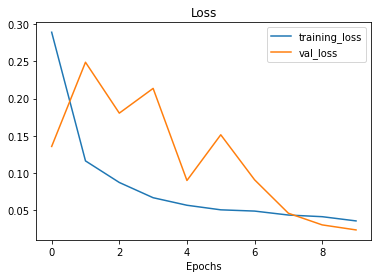

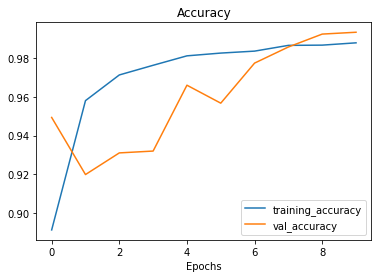

In [9]:
plot_loss_curves(history)

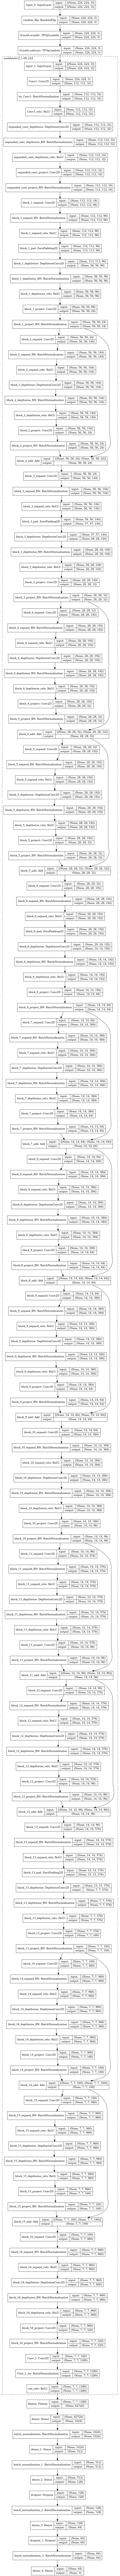

In [10]:
tf.keras.utils.plot_model(model, to_file='MobileNetv2.png',expand_nested=True,show_shapes=True)

In [11]:
Accuracy['MobileNet'] = history.history['accuracy'][-1]

In [12]:
Accuracy['MobileNet']

0.987872302532196

In [13]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

132/132 [==============================] - 54s 408ms/step - loss: 0.0234 - accuracy: 0.9933
test accuracy :  0.9933412671089172


In [14]:
model.save('MobileNetv2.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
